In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import math
from IPython import display
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import acorr

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, r2_score, mean_squared_error, plot_roc_curve
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

import lightgbm as lgb

from sklearn.metrics import zero_one_loss
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from scipy import stats

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB

from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import precision_recall_fscore_support
from IPython.display import display

import matplotlib
matplotlib.rc('font', size = 14)
matplotlib.rcParams['axes.grid'] = True

pd.options.display.max_rows = 30
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, 
             test_size=0.3, k_range=(1, 20), n_trials=100):
    
    train_errors = []
    test_errors = []
    ks = list(range(k_range[0], k_range[1] + 1))

    for i in range(0, n_trials):
        X, y = make_classification(n_instances, n_features, n_classes=n_classes, 
                                   n_informative=n_informative, n_redundant=0, n_clusters_per_class=1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        train = []
        test = []
        for k in ks:
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            train.append(1 - knn.score(X_train, y_train))
            test.append(1 - knn.score(X_test, y_test))
        train_errors.append(train)
        test_errors.append(test)
        
    train_errors = np.mean(np.array(train_errors), axis=0)
    test_errors = np.mean(np.array(test_errors), axis=0)
    best_k = ks[np.argmin(test_errors)]
    
    return (best_k, train_errors, test_errors)

,Open,High,Low,Close,Volume,NumberOfTrades,VWAP,Spread,ReturnCO,ReturnCC,ReturnVW,Volatility,Volatility10
0,463.00,463.00,460.55,460.55,12019.624607,17,462.549542,2.45,-0.005292,1.000000,1.000000,1.035091,0
1,460.40,460.40,452.00,453.20,185027.749593,144,456.906878,8.40,-0.015639,-0.015959,-0.012199,2.248130,1
2,453.20,455.60,450.00,450.00,102007.271835,84,451.607345,5.60,-0.007061,-0.007061,-0.011599,1.772457,1
3,453.97,453.98,450.00,451.11,18008.751992,35,451.562299,3.98,-0.006300,0.002467,-0.000100,1.259226,1
4,452.93,456.53,452.83,456.53,75054.379497,52,453.994703,3.70,0.007948,0.012015,0.005387,0.975154,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306287,6674.74,6686.00,6665.84,6681.53,14330.817397,19,6678.941079,20.16,0.001017,0.000346,-0.000263,4.729200,1
2306288,6679.20,6698.46,6676.93,6676.93,142639.223531,14,6685.722830,21.53,-0.000340,-0.000688,0.001015,5.625640,1
2306289,6687.51,6692.52,6681.22,6685.48,8719.574505,9,6686.675966,11.30,-0.000304,0.001281,0.000143,3.298921,1
2306290,6683.74,6688.71,6676.88,6681.99,53265.957363,19,6679.945953,11.83,-0.000262,-0.000522,-0.001006,3.949251,1


,Time,Open,btcsum,High,Low,Close,Volume,NumberOfTrades,VWAP,Spread,ReturnCO,ReturnCC,ReturnVW,Volatility,Volatility10
0,2015-11-04 21:00:00,463.00,430.942837,463.00,452.00,453.20,197047.374201,161,457.247127,11.00,-0.021166,1.000000,1.000000,2.602860,1
1,2015-11-04 21:05:00,453.20,746.312087,459.11,450.00,458.94,339136.385451,250,454.416311,9.11,0.012665,0.012665,-0.006191,2.477923,1
2,2015-11-04 21:10:00,459.00,434.419496,461.94,454.09,455.86,198419.806459,133,456.747011,7.85,-0.006841,-0.006711,0.005129,1.775716,0
3,2015-11-04 21:15:00,455.87,253.826510,457.33,450.00,454.04,114821.623066,150,452.362612,7.33,-0.004014,-0.003992,-0.009599,1.965587,0
4,2015-11-04 21:20:00,450.48,530.419299,453.67,446.81,451.88,238730.363787,234,450.078578,6.86,0.003108,-0.004757,-0.005049,1.585762,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461254,2020-03-24 10:50:00,6721.61,19.387352,6756.91,6712.64,6756.91,130546.033602,45,6733.566901,44.27,0.005252,0.005005,0.001472,11.630189,1
461255,2020-03-24 10:55:00,6755.90,37.069981,6755.90,6733.16,6749.26,249921.345445,51,6741.879500,22.74,-0.000983,-0.001132,0.001235,4.788496,1
461256,2020-03-24 11:00:00,6745.17,78.721210,6745.54,6701.75,6720.82,528412.296612,83,6712.451368,43.79,-0.003610,-0.004214,-0.004365,9.431233,1
461257,2020-03-24 11:05:00,6716.37,132.791178,6725.00,6655.20,6679.22,887340.502418,176,6682.224814,69.80,-0.005531,-0.006190,-0.004503,13.247595,1


,Time,Open,High,Low,Close,Volume,NumberOfTrades,VWAP,Spread,ReturnCO,ReturnCC,ReturnVW,Volatility,Volatility10
0,2015-11-04 21:00:00,463.00,463.00,450.00,458.94,5.361838e+05,411,455.452552,13.00,-0.008769,1.000000,1.000000,3.024930,0
1,2015-11-04 21:10:00,459.00,461.94,450.00,454.04,3.132414e+05,283,455.130036,11.94,-0.010806,-0.010677,-0.000708,3.405478,1
2,2015-11-04 21:20:00,450.48,453.67,446.81,450.00,3.741168e+05,381,449.869464,6.86,-0.001066,-0.008898,-0.011558,1.528875,0
3,2015-11-04 21:30:00,450.00,454.00,442.18,442.47,3.316574e+05,302,447.422958,11.82,-0.016733,-0.016733,-0.005438,3.525250,1
4,2015-11-04 21:40:00,442.47,443.00,412.00,412.00,1.438933e+06,1242,427.503847,31.00,-0.068863,-0.068863,-0.044520,7.445793,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230625,2020-03-24 10:30:00,6784.16,6788.52,6706.81,6726.55,7.740191e+05,182,6736.296040,81.71,-0.008492,-0.009025,-0.003573,21.341527,1
230626,2020-03-24 10:40:00,6717.89,6750.54,6708.23,6723.26,1.807197e+05,95,6733.138970,42.31,0.000799,-0.000489,-0.000469,10.625985,1
230627,2020-03-24 10:50:00,6721.61,6756.91,6712.64,6749.26,3.804674e+05,96,6739.024968,44.27,0.004114,0.003867,0.000874,10.038215,1
230628,2020-03-24 11:00:00,6745.17,6745.54,6655.20,6679.22,1.415753e+06,259,6693.474608,90.34,-0.009777,-0.010377,-0.006759,20.108026,1


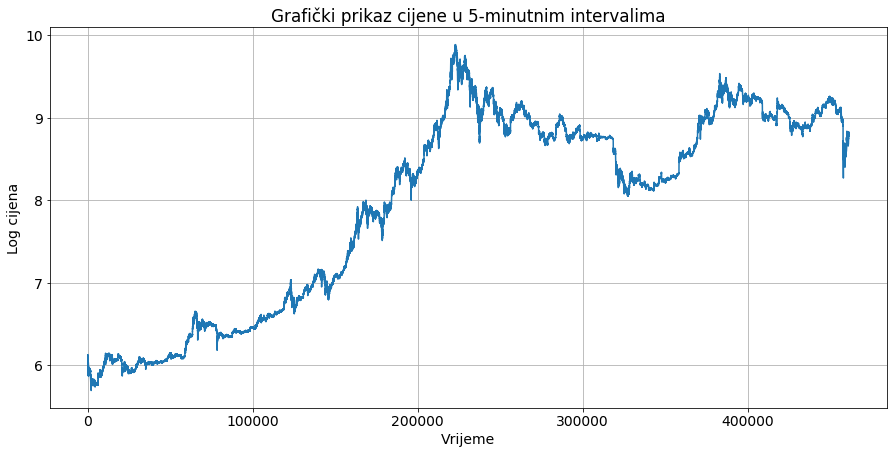

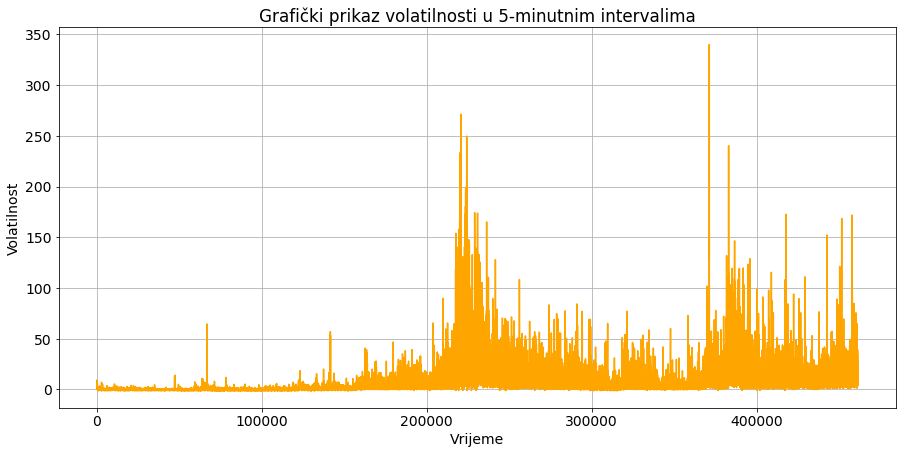

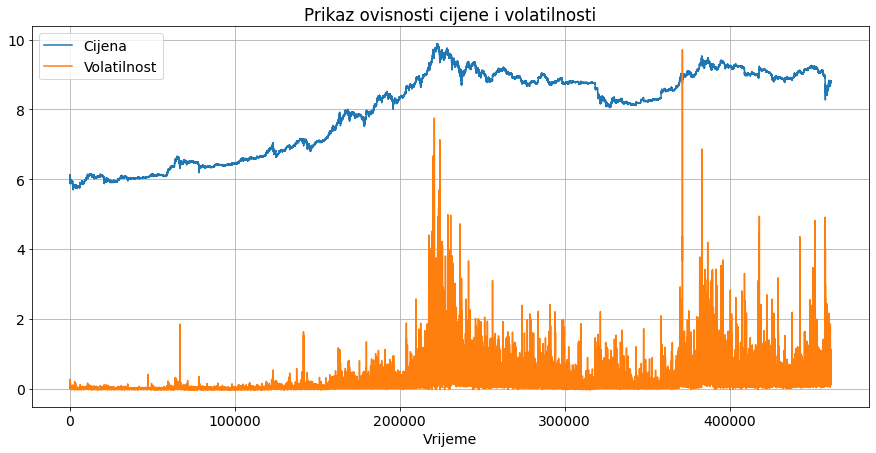

In [9]:
data1T = pd.read_csv('/content/drive/My Drive/dipl/data1T.csv', delimiter=',', header=0)
data5T = pd.read_csv('/content/drive/My Drive/dipl/data5T.csv', delimiter=',', header=0)
data10T = pd.read_csv('/content/drive/My Drive/dipl/data10T.csv', delimiter=',', header=0)

data1T.replace([np.inf, -np.inf], np.nan, inplace=True)
data5T.replace([np.inf, -np.inf], np.nan, inplace=True)
data10T.replace([np.inf, -np.inf], np.nan, inplace=True)
data1T = data1T.fillna(0)
data5T = data5T.fillna(0)
data10T = data10T.fillna(0)

display(data1T)
display(data5T)
display(data10T)

plt.figure(figsize=(15,7))
plt.title('Grafički prikaz cijene u 5-minutnim intervalima')
plt.plot(np.arange(len(data5T['Close'])),np.log(data5T['Close']))
plt.xlabel('Vrijeme')
plt.ylabel('Log cijena')
plt.savefig('1.svg')
plt.show()

plt.figure(figsize=(15,7))
plt.title('Grafički prikaz volatilnosti u 5-minutnim intervalima')
plt.plot(np.arange(len(data5T['Volatility'])), data5T['Volatility'], color ='orange')
plt.xlabel('Vrijeme')
plt.ylabel('Volatilnost')
plt.savefig('2.svg')
plt.show()

plt.figure(figsize=(15,7))
plt.title('Prikaz ovisnosti cijene i volatilnosti')
plt.plot(np.arange(len(data5T['Close'])),np.log(data5T['Close']))
plt.plot(np.arange(len(data5T['Volatility'])), data5T['Volatility']/35)
plt.legend(['Cijena', 'Volatilnost'], loc='upper left')
plt.xlabel('Vrijeme')
plt.savefig('3.svg')
plt.show()

In [11]:
X_1T = data1T.loc[: , 'Close' : 'ReturnVW']
Y_1T = data1T.loc[: , 'Volatility' : 'Volatility10']
#Y_1T['Volatility10'] = data1T['Volatility10']

X_5T = data5T.loc[: , 'Close' : 'ReturnVW']
Y_5T = data5T.loc[: ,'Volatility' : 'Volatility10']
#Y_5T['Volatility10'] = data5T['Volatility10']

X_10T = data10T.loc[: , 'Close' : 'ReturnVW']
Y_10T = data10T.loc[: ,'Volatility' : 'Volatility10']
#Y_10T['Volatility10'] = data10T['Volatility10']

#rijesi se prvog rowa lookaheada i zadnjeg lookbacka (da model radi predikciju za sljedeci lookahead temeljem prijasnjeg lookbacka) 
X_1T.drop(X_1T.tail(1).index, inplace=True)
X_5T.drop(X_5T.tail(1).index, inplace=True)
X_10T.drop(X_10T.tail(1).index, inplace=True)
Y_1T = Y_1T.iloc[1:]
Y_1T = Y_1T.reset_index(drop = True)
#Y_1T_bin = Y_1T_bin.iloc[1:]

Y_5T = Y_5T.iloc[1:]
Y_5T = Y_5T.reset_index(drop = True)
#Y_5T_bin = Y_5T_bin.iloc[1:]

Y_10T = Y_10T.iloc[1:]
Y_10T = Y_10T.reset_index(drop = True)
#Y_10T_bin = Y_10T_bin.iloc[1:]

display(Y_1T)
display(X_10T)
display(Y_10T)


,Volatility,Volatility10
0,2.248130,1
1,1.772457,1
2,1.259226,1
3,0.975154,0
4,1.102312,0
...,...,...
2306286,4.729200,1
2306287,5.625640,1
2306288,3.298921,1
2306289,3.949251,1


,Close,Volume,NumberOfTrades,VWAP,Spread,ReturnCO,ReturnCC,ReturnVW
0,458.94,5.361838e+05,411,455.452552,13.00,-0.008769,1.000000,1.000000
1,454.04,3.132414e+05,283,455.130036,11.94,-0.010806,-0.010677,-0.000708
2,450.00,3.741168e+05,381,449.869464,6.86,-0.001066,-0.008898,-0.011558
3,442.47,3.316574e+05,302,447.422958,11.82,-0.016733,-0.016733,-0.005438
4,412.00,1.438933e+06,1242,427.503847,31.00,-0.068863,-0.068863,-0.044520
...,...,...,...,...,...,...,...,...
230624,6787.81,5.852882e+05,187,6760.451641,64.28,0.006213,0.005733,0.003481
230625,6726.55,7.740191e+05,182,6736.296040,81.71,-0.008492,-0.009025,-0.003573
230626,6723.26,1.807197e+05,95,6733.138970,42.31,0.000799,-0.000489,-0.000469
230627,6749.26,3.804674e+05,96,6739.024968,44.27,0.004114,0.003867,0.000874


,Volatility,Volatility10
0,3.405478,1
1,1.528875,0
2,3.525250,1
3,7.445793,1
4,4.892246,1
...,...,...
230624,21.341527,1
230625,10.625985,1
230626,10.038215,1
230627,20.108026,1


# TEST


In [ ]:
X_train_1T, X_test_1T = np.split(X_1T, [int(.8 *len(X_1T))])
y_train_1T, y_test_1T = np.split(Y_1T, [int(.8 *len(Y_1T))])

X_train_5T, X_test_5T = np.split(X_5T, [int(.8 *len(X_5T))])
y_train_5T, y_test_5T = np.split(Y_5T, [int(.8 *len(Y_5T))])

X_train_10T, X_test_10T = np.split(X_10T, [int(.8 *len(X_10T))])
y_train_10T, y_test_10T = np.split(Y_10T, [int(.8 *len(Y_10T))])

"""
X_train_uk = [X_train_1T, X_train_5T, X_train_10T]
y_train_uk = [y_train_1T, y_train_5T, y_train_10T]
X_test_uk = [X_test_1T, X_test_5T, X_test_10T]
y_test_uk = [y_test_1T, y_test_5T, y_test_10T]
#print(y_test)
"""

In [ ]:
#Imamo 6 kombinacija (3,2,1)
#----------------Treniranje----------------
print(X_train_1T)
for i, row in enumerate(y_train_1T):
  regressor = LogisticRegression()
  regressor.fit(X_train_1T[i], y_train_1T[i])
  print('--- ', i, 'Preciznost traina: ', accuracy_score(y_train_1T[i], regressor.predict(X_train_1T[i])))

           Close         Volume  NumberOfTrades         VWAP  Spread  \
0           6.00     149.190000               4     5.967600    0.20   
1           0.00       0.000000               0     0.000000    0.00   
2           0.00       0.000000               0     0.000000    0.00   
3           0.00       0.000000               0     0.000000    0.00   
4           0.00       0.000000               0     0.000000    0.00   
...          ...            ...             ...          ...     ...   
3588348  6365.34  424727.458448             137  6346.922989   55.14   
3588349  6350.89  204281.596553              89  6355.415740   17.09   
3588350  6359.84  121950.718498              93  6358.976245   13.36   
3588351  6358.14   49760.644493              45  6363.006542   10.76   
3588352  6361.32  257544.115199              87  6356.161719   18.80   

         ReturnCO  ReturnCC  ReturnVW  
0        0.034483  6.000000  5.967600  
1        0.000000  0.000000  0.000000  
2        0.0000

KeyError: ignored

In [ ]:
#Pristup di sam za svaki mali window i svaki pomak tih windowa radio zasebni model (ima li smisla? -> nedostatak podataka)
#Imamo 6 kombinacija (3,2,1)

X_uk = [X_1T, X_5T, X_10T]
y_uk = [Y_1T, Y_5T, Y_10T]
#----------------Treniranje----------------
cnt = 0
for lookback_window in X_uk:
  for lookahead_window in y_uk:
      if(len(lookback_window)>=len(lookahead_window)):
        cnt+=1
        logreg = LogisticRegression()
        linreg = LinearRegression()
        print('Ovo je ', cnt,'. slučaj za veličine lookback', len(lookback_window),'i lookahead', len(lookahead_window))
        #print(len(lookback_window), len(lookahead_window))
        X_train_temp, X_test_temp = np.split(lookback_window, [int(.8 *len(lookback_window))])
        y_train_temp, y_test_temp = np.split(lookahead_window, [int(.8 *len(lookahead_window))])
        print(len(X_train_temp), len(X_test_temp), len(y_train_temp), len(y_test_temp), round(len(X_train_temp)/len(y_train_temp)), round(len(X_test_temp)/len(y_test_temp)))
        print(round(len(lookback_window)/len(lookahead_window)))
        #X_train_temp
        #X_train_temp.to_csv('/content/drive/My Drive/dipl/test.csv', index=False)
        X_test_temp = X_test_temp.reset_index(drop = True)
        y_test_temp = y_test_temp.reset_index(drop = True)
        X_tr = []
        lookahead = round(len(lookback_window)/len(lookahead_window))
        number_of_evals = 0
        for t in range(0+lookahead, len(lookback_window)-1):
          #print(lookahead)
          X_tr, X_te = X_train_temp.loc[t-lookahead : t-1], X_test_temp.loc[t-lookahead : t-1]
          y_tr, y_te = y_train_temp.loc[t-lookahead+1], y_test_temp.loc[t-lookahead+1]
          #y_tr, y_te = y_train_temp.loc[t-lookahead+1 : t], y_test_temp.loc[t-lookahead+1 : t]
          #print(X_tr.type())
          #print((X_tr.isin([0]).all()))
          #X_tr['Close'].isin([0]).all() or y_tr.isin([0]).all()
          #.values.astype(int) za u intove na y tr i y te
          #print(y_te)
          #if not np.any(X_tr) or not np.any(y_tr) or not np.any(X_te):
            #print('jesam')
            #continue
          
          y_tr = pd.Series(y_tr)
          y_te = pd.Series(y_te)
          """
          print(X_tr)
          print(y_tr)
          print(X_te)
          print(y_te)
          print(type(X_tr))
          print(type(y_tr))
          print(type(X_te))
          print(type(y_te))
          """
          linreg.fit(X_tr, y_tr)
          y_pred = linreg.predict(X_te)
          number_of_evals+=1
          """
          logreg.fit(X_tr, y_tr)
          y_pred = logreg.predict(X_te)
          """
          print(number_of_evals, ' y_te =', y_te, 'y_pred =', y_pred)
          print('Accuracy R2: ', r2_score(y_te, y_pred))
          print('Accuracy MSE: ', mean_squared_error(y_te, y_pred))
          print('\n')
          #print('Accuracy Score: ', accuracy_score(y_te, y_pred))
          #print('AUC: ', roc_auc_score(y_te, y_pred))
          #print('F1: ', f1_score(y_te, y_pred))

    #for t in range(0, len())



127951  y_te = 0    0.0
dtype: float64 y_pred = [0.]
Accuracy R2:  nan
Accuracy MSE:  0.0


127952  y_te = 0    2.12802
dtype: float64 y_pred = [0.]
Accuracy R2:  nan
Accuracy MSE:  4.528469590642881


127953  y_te = 0    0.002085
dtype: float64 y_pred = [0.]
Accuracy R2:  nan
Accuracy MSE:  4.347826086908047e-06


127954  y_te = 0    1.793981
dtype: float64 y_pred = [0.]
Accuracy R2:  nan
Accuracy MSE:  3.2183686609686992


127955  y_te = 0    0.972528
dtype: float64 y_pred = [0.]
Accuracy R2:  nan
Accuracy MSE:  0.9458113131313985


127956  y_te = 0    0.851676
dtype: float64 y_pred = [0.]
Accuracy R2:  nan
Accuracy MSE:  0.7253516339870151


127957  y_te = 0    0.514471
dtype: float64 y_pred = [0.]
Accuracy R2:  nan
Accuracy MSE:  0.26468076923081624


127958  y_te = 0    1.430982
dtype: float64 y_pred = [0.]
Accuracy R2:  nan
Accuracy MSE:  2.047708461538523


127959  y_te = 0    1.830608
dtype: float64 y_pred = [0.]
Accuracy R2:  nan
Accuracy MSE:  3.351124999999643


127960  y_te

KeyboardInterrupt: ignored

# Training and Testing Models

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
	LINEARNA REGRESIJA
1 . za iznos velicine lookaheada 1 minuta.
y_test = [0.         0.         1.99629657 ... 3.2989207  3.94925058 3.56840581] 
 y_pred = [1.78412718 1.39013034 1.37325335 ... 5.52923928 3.66384118 3.79435671]
Accuracy RMSE of train:  2.3749414174193255
Accuracy R2:  0.34951936775809544
Accuracy RMSE:  2.7396691297072877


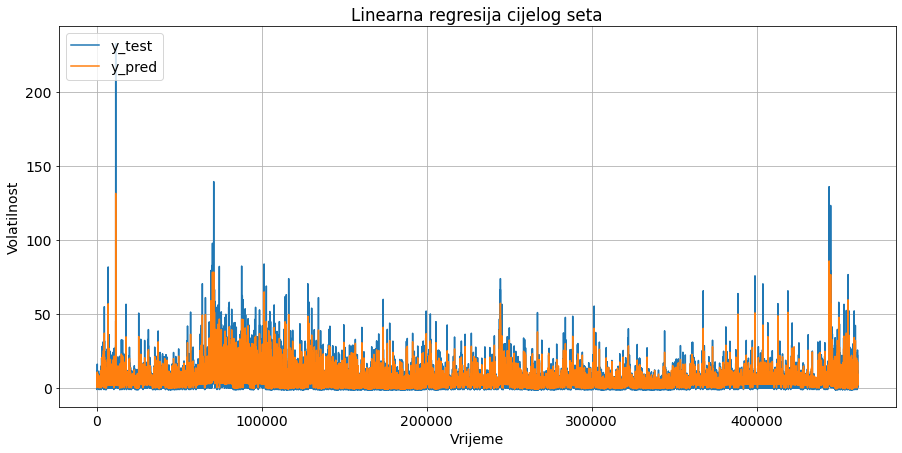

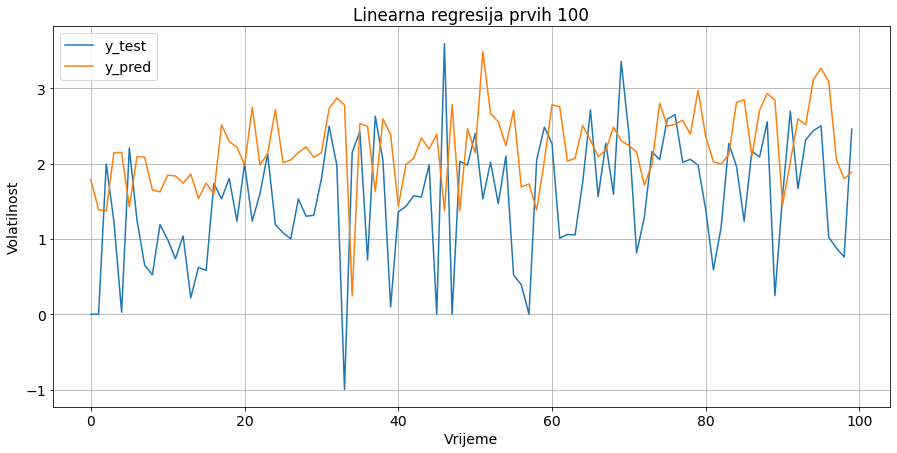

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	LOGISTIČKA REGRESIJA
1 . za iznos velicine lookaheada 1 minuta.
y_test = [0 0 1 ... 1 1 1] 
 y_pred = [0 0 0 ... 1 1 1]
Accuracy Score of train:  0.8126027082457107
Accuracy Score:  0.8738691277568568
AUC:  0.528235476499962
F1:  0.9320069513510607
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	GAUSSIAN NB KLASIFIKACIJA
1 . za iznos velicine lookaheada 1 minuta.
y_test = [0 0 1 ... 1 1 1] 
 y_pred = [1 1 1 ... 1 1 1]
Accuracy Score of train:  0.7878925677169827
Accuracy Score:  0.8854743213682551
AUC:  0.5076878754833365
F1:  0.9390846905687704
--------------------------------------------

KeyboardInterrupt: ignored

In [13]:
#Pristup di za svaku smislenu kombinaciju lookback i lookahead windowa treniram po jedan model svakim regresorom
#Imamo 6 kombinacija (3,2,1)

X_uk = [X_1T, X_5T, X_10T]
y_uk = [Y_1T, Y_5T, Y_10T]
#----------------Treniranje----------------
cnt = 0
for lookback_window in X_uk:
  for lookahead_window in y_uk:
      if(len(lookback_window)>=len(lookahead_window)):
        lookahead = round(len(lookback_window)/len(lookahead_window))
        if(len(lookback_window)>len(lookahead_window)):
          lookahead_window = pd.DataFrame(np.repeat(lookahead_window.values,lookahead, axis=0))
             
        X_train_temp, X_test_temp = np.split(lookback_window, [int(.8 *len(lookback_window))])
        y_train_temp, y_test_temp = np.split(lookahead_window, [int(.8 *len(lookahead_window))])
        X_test_temp = X_test_temp.reset_index(drop = True)
        y_test_temp = y_test_temp.reset_index(drop = True)

        
        scaler = StandardScaler().fit(X_train_temp)
        X_train_temp = scaler.transform(X_train_temp)
        X_test_temp = scaler.transform(X_test_temp)
        
        """
        print(X_train_temp)
        print(X_test_temp)
        print(y_train_temp)
        print(y_test_temp)
        print(' y_te =', y_test_temp, 'y_pred =', y_pred))
        """
        y_train_real = y_train_temp.iloc[:,0]
        y_test_real = y_test_temp.iloc[:,0]
        y_train_10 = y_train_temp.iloc[:,1]
        y_test_10 = y_test_temp.iloc[:,1]

        
        cnt+=1
        #LINEARNA REGRESIJA
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        print('\tLINEARNA REGRESIJA')
        linreg = LinearRegression()
        linreg.fit(X_train_temp, y_train_real)
        y_pred_train = linreg.predict(X_train_temp)
        y_pred = linreg.predict(X_test_temp)
        
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija cijelog seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.savefig('6.svg')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija prvih 100')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.savefig('7.svg')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

        #LOGISTIČKA REGRESIJA
        print('\n')
        print('\tLOGISTIČKA REGRESIJA')
        logreg = LogisticRegression()
        logreg.fit(X_train_temp ,y_train_10)
        y_pred_train = logreg.predict(X_train_temp)
        y_pred = logreg.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        """
        plt.figure(figsize=(30,16))
        plt.title('Logistička regresija')
        plt.plot(np.arange(len(y_test_10)), y_test_10*5)
        plt.plot(np.arange(len(y_test_10)), y_pred*5)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        """
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #GAUSSIAN NB KLASIFIKACIJA
        print('\n')
        print('\tGAUSSIAN NB KLASIFIKACIJA')
        gnb = GaussianNB()
        gnb.fit(X_train_temp ,y_train_10)
        y_pred_train = gnb.predict(X_train_temp)
        y_pred = gnb.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

        #RandomForest
        print('\n')
        print('\tRF KLASIFIKACIJA')
        rfc = RandomForestClassifier(n_estimators=200, max_depth=3)
        rfc.fit(X_train_temp ,y_train_10)
        y_pred_train = rfc.predict(X_train_temp)
        y_pred = rfc.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        
        pom = []
        for col in X_10T.columns: 
          pom.append(col) 

        feature_imp = pd.Series(rfc.feature_importances_, index=pom).sort_values(ascending=False)
        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title("Visualizing Important Features")
        plt.legend()
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #LightGBM
        print('\n')
        print('\tLightGBM')
        print(len(X_train_temp), len(y_train_real))
        if(len(lookback_window)>len(lookahead_window)):
          X_test_temp = np.delete(X_test_temp, len(X_test_temp)-1, axis=0)
        print(X_test_temp.shape, len(y_test_real))
        lgb_train = lgb.Dataset(X_train_temp, y_train_real)
        lgb_eval = lgb.Dataset(X_test_temp, y_test_real, reference=lgb_train)
        params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'l2', 'l1'},
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbose': 0
        }
        gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
        y_pred = gbm.predict(X_test_temp, num_iteration=gbm.best_iteration)

        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('LightGBM cijelog seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('LightGBM prvih 100')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.show()
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        
        """
        E_train = [];
        E_tst = [];

        for i in [200]:
            RF = RandomForestClassifier(n_estimators = i+1).fit(X_train_temp, y_train_10)
            print(i)
            h_train = RF.predict(X_train_temp)
            h_tst = RF.predict(X_test_temp)
            
            E_train.append(zero_one_loss(y_train_10, h_train))
            E_tst.append(zero_one_loss(y_test_10, h_tst))

        min_E = min(E_tst)
        ind = E_tst.index(min_E)

        plt.figure(figsize=(15, 7))
        plt.plot(np.arange(1), E_train, label = 'E_train')
        plt.plot(np.arange(1), E_tst, label = 'E_tst')
        plt.scatter(np.arange(1)[ind], min_E, label = 'min pogreske testiranja')

        plt.legend(loc = 'best'); plt.xlabel('L'); plt.ylabel('Eor')
        plt.grid();
        print (E_train)
        print (E_tst)

        print('Minimum pogreske za testiranje => ', min_E)

        #KNN
        #Prvo probat za različit broj susjeda koji daje najmanju grešku :)
        knn = KNeighborsClassifier(n_neighbors=100)
        knn.fit(X_train_temp, y_train_10)
        y_pred_train = knn.predict(X_train_temp)
        y_pred = knn.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        
        for i in range(1, 40):
          knn = KNeighborsClassifier(n_neighbors=i)
          knn.fit(X_train_temp, y_train_10)
          pred_i = knn.predict(X_test_temp)
          error.append(np.mean(pred_i != y_test_10))
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
                markerfacecolor='blue', markersize=10)
        plt.title('Error Rate K Value')
        plt.xlabel('K Value')
        plt.ylabel('Mean Error')
        """


In [ ]:
#Deep Learning Method
#Imamo 6 kombinacija (3,2,1)

X_uk = [X_1T, X_5T, X_10T]
y_uk = [Y_1T, Y_5T, Y_10T]
#----------------ANN----------------
scaler = MinMaxScaler(feature_range=(0,1))
cnt = 0
for lookback_window in X_uk:
  for lookahead_window in y_uk:
      if(len(lookback_window)>=len(lookahead_window)):
        lookahead = round(len(lookback_window)/len(lookahead_window))
        if(len(lookback_window)>len(lookahead_window)):
          lookahead_window = pd.DataFrame(np.repeat(lookahead_window.values,lookahead, axis=0))
             
        X_train, X_test = np.split(lookback_window, [int(.8 *len(lookback_window))])
        y_train, y_test = np.split(lookahead_window, [int(.8 *len(lookahead_window))])

        X_train, X_val = np.split(X_train, [int(.8 *len(X_train))])
        y_train, y_val = np.split(y_train, [int(.8 *len(y_train))])

        X_test = X_test.reset_index(drop = True)
        y_test = y_test.reset_index(drop = True)

        X_val = X_val.reset_index(drop = True)
        y_val = y_val.reset_index(drop = True)

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        X_val = scaler.transform(X_val)

        if(len(lookback_window)>len(lookahead_window)):
          X_test = np.delete(X_test, len(X_test)-1, axis=0)

        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
        model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
        model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))
        model.compile(optimizer="adam", loss="mean_squared_error")
        #fit model
        model.fit(X_train, y_train, epochs=10)
        #evaluate model on test data
        model.evaluate(X_test, y_test)

        # backtest the model
        y_pred = model.predict(X_val)
        # create empty table with 2 fields --> nesto da namistim dimenzije
        helper = np.zeros(shape=(len(y_pred), 8) )
        # put the predicted values in the right field
        helper[:,0] = y_pred[:,0]
        # inverse transform and then select the right field
        y_pred = scaler.inverse_transform(helper)[:,0]
        plt.figure(figsize=(30,16))
        plt.plot(y_test, color = 'blue', label = 'Validation data volatility')
        plt.plot(y_pred, color = 'yellow', label = 'Predicted data volatility')
        plt.title('Prediction of volatility with MLP')
        plt.xlabel('Time')
        plt.ylabel('volatility')
        plt.legend()
        plt.show()





cnt = 0
for lookback_window in X_uk:
  for lookahead_window in y_uk:
      if(len(lookback_window)>=len(lookahead_window)):
        lookahead = round(len(lookback_window)/len(lookahead_window))
        if(len(lookback_window)>len(lookahead_window)):
          lookahead_window = pd.DataFrame(np.repeat(lookahead_window.values,lookahead, axis=0))
             
        X_train, X_test = np.split(lookback_window, [int(.8 *len(lookback_window))])
        y_train, y_test = np.split(lookahead_window, [int(.8 *len(lookahead_window))])

        X_train, X_val = np.split(X_train, [int(.8 *len(X_train))])
        y_train, y_val = np.split(y_train, [int(.8 *len(y_train))])

        X_test = X_test.reset_index(drop = True)
        y_test = y_test.reset_index(drop = True)

        X_val = X_val.reset_index(drop = True)
        y_val = y_val.reset_index(drop = True)

        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        X_val = scaler.transform(X_val)

        X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
        X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
        X_val = X_val.reshape(X_val.shape[0],X_val.shape[1],1)

        if(len(lookback_window)>len(lookahead_window)):
          X_test = np.delete(X_test, len(X_test)-1, axis=0)
          
        # define model
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.LSTM(20, input_shape=(X_train.shape[1], 1), return_sequences=True))
        model.add(tf.keras.layers.LSTM(20))
        model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))
        model.compile(optimizer="adam", loss="mean_squared_error")
        # fit model
        model.fit(X_train, y_train, epochs = 1000, batch_size = 32)
        # evaluate model on test data
        model.evaluate(X_test, y_test)

        # backtest the model
        y_pred = model.predict(X_val)
        # create empty table with 2 fields
        helper = np.zeros(shape=(len(y_pred), 8) )
        # put the predicted values in the right field
        helper[:,0] = y_pred[:,0]
        # inverse transform and then select the right field
        y_pred = scaler.inverse_transform(helper)[:,0]
        plt.figure(figsize=(30,16))
        plt.plot(y_val, color = 'blue', label = 'Validation data return')
        plt.plot(y_pred, color = 'green', label = 'Predicted data return')
        plt.title('Prediction of returns with LSTM')
        plt.xlabel('Time')
        plt.ylabel('Data return')
        plt.legend()
        plt.show()


Epoch 1/1000
24573/89709 [=======>......................] - ETA: 8:42 - loss: 0.0800

KeyboardInterrupt: ignored

# Testing the models accuracy with 2 window step (for eliminating possibility of bias error)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
	LINEARNA REGRESIJA
1845032 1845032
1 . za iznos velicine lookaheada 1 minuta.
y_test = [0.         0.         1.99629657 ... 3.2989207  3.94925058 3.56840581] 
 y_pred = [1.78412718 1.39013034 1.37325335 ... 5.52923928 3.66384118 3.79435671]
Accuracy RMSE of train:  2.3749414174193255
Accuracy R2:  0.34951936775809544
Accuracy RMSE:  2.7396691297072877


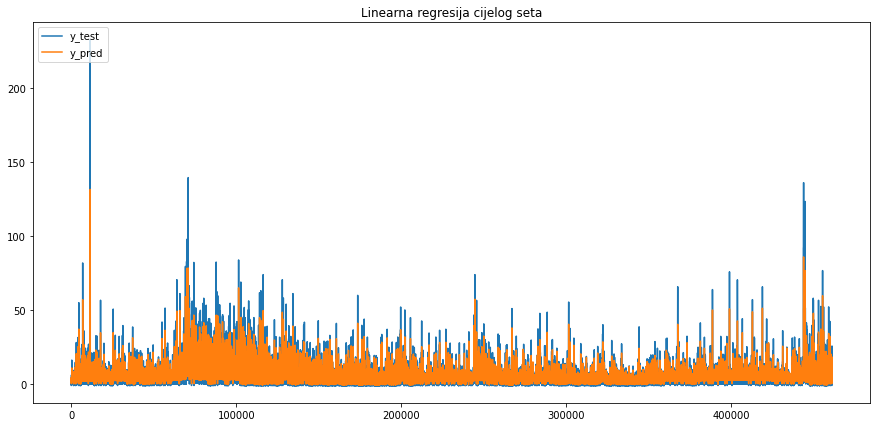

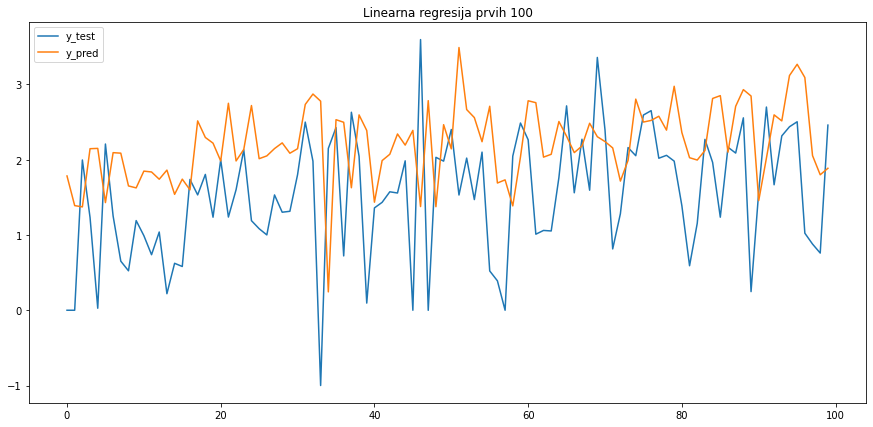

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	LOGISTIČKA REGRESIJA
1 . za iznos velicine lookaheada 1 minuta.
y_test = [0 0 1 ... 1 1 1] 
 y_pred = [0 0 0 ... 1 1 1]
Accuracy Score of train:  0.8126027082457107
Accuracy Score:  0.8738691277568568
AUC:  0.528235476499962
F1:  0.9320069513510607
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	GAUSSIAN NB KLASIFIKACIJA
1 . za iznos velicine lookaheada 1 minuta.
y_test = [0 0 1 ... 1 1 1] 
 y_pred = [1 1 1 ... 1 1 1]
Accuracy Score of train:  0.7878925677169827
Accuracy Score:  0.8854743213682551
AUC:  0.5076878754833365
F1:  0.9390846905687704
--------------------------------------------

KeyboardInterrupt: ignored

In [ ]:
#Pristup di za svaku smislenu kombinaciju lookback i lookahead windowa treniram po jedan model svakim regresorom
#Imamo 6 kombinacija (3,2,1)

X_uk = [X_1T, X_5T, X_10T]
y_uk = [Y_1T, Y_5T, Y_10T]
#----------------Treniranje----------------
cnt = 0
for lookback_window in X_uk:
  for lookahead_window in y_uk:
      if(len(lookback_window)>=len(lookahead_window)):
        lookahead = round(len(lookback_window)/len(lookahead_window))
        if(len(lookback_window)>len(lookahead_window)):
          lookahead_window = pd.DataFrame(np.repeat(lookahead_window.values,lookahead, axis=0))
             
        X_train_temp, X_test_temp = np.split(lookback_window, [int(.8 *len(lookback_window))])
        y_train_temp, y_test_temp = np.split(lookahead_window, [int(.8 *len(lookahead_window))])
        X_test_temp = X_test_temp.reset_index(drop = True)
        y_test_temp = y_test_temp.reset_index(drop = True)

        scaler = StandardScaler().fit(X_train_temp)
        X_train_temp = scaler.transform(X_train_temp)
        X_test_temp = scaler.transform(X_test_temp)
        """
        print(X_train_temp)
        print(X_test_temp)
        print(y_train_temp)
        print(y_test_temp)
        print(' y_te =', y_test_temp, 'y_pred =', y_pred))
        """
        y_train_real = y_train_temp.iloc[:,0]
        y_test_real = y_test_temp.iloc[:,0]
        y_train_10 = y_train_temp.iloc[:,1]
        y_test_10 = y_test_temp.iloc[:,1]

        
        cnt+=1
        #LINEARNA REGRESIJA
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        print('\tLINEARNA REGRESIJA')
        print(len(X_train_temp), len(y_train_real))
        linreg = LinearRegression()
        if(len(lookback_window)>len(lookahead_window)):
          X_train_temp = np.delete(X_train_temp, [len(X_train_temp)-4, len(X_train_temp)-3, len(X_train_temp)-2, len(X_train_temp)-1], axis=0)
          print(len(X_train_temp))
        linreg.fit(X_train_temp, y_train_real)
        y_pred_train = linreg.predict(X_train_temp)
        y_pred = linreg.predict(X_test_temp)
        
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija cijelog seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija prvih 100')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

        #LOGISTIČKA REGRESIJA
        print('\n')
        print('\tLOGISTIČKA REGRESIJA')
        logreg = LogisticRegression()
        if(len(lookback_window)>len(lookahead_window)):
          X_train_temp = np.delete(X_train_temp, [len(X_train_temp)-4, len(X_train_temp)-3, len(X_train_temp)-2, len(X_train_temp)-1], axis=0)
        logreg.fit(X_train_temp ,y_train_10)
        y_pred_train = logreg.predict(X_train_temp)
        y_pred = logreg.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        """
        plt.figure(figsize=(30,16))
        plt.title('Logistička regresija')
        plt.plot(np.arange(len(y_test_10)), y_test_10*5)
        plt.plot(np.arange(len(y_test_10)), y_pred*5)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        """
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #GAUSSIAN NB KLASIFIKACIJA
        print('\n')
        print('\tGAUSSIAN NB KLASIFIKACIJA')
        gnb = GaussianNB()
        if(len(lookback_window)>len(lookahead_window)):
          X_train_temp = np.delete(X_train_temp, [len(X_train_temp)-4, len(X_train_temp)-3, len(X_train_temp)-2, len(X_train_temp)-1], axis=0)
        gnb.fit(X_train_temp ,y_train_10)
        y_pred_train = gnb.predict(X_train_temp)
        y_pred = gnb.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

        #RandomForest
        print('\n')
        print('\tRF KLASIFIKACIJA')
        rfc = RandomForestClassifier(n_estimators=200, max_depth=3)
        if(len(lookback_window)>len(lookahead_window)):
          X_train_temp = np.delete(X_train_temp, [len(X_train_temp)-4, len(X_train_temp)-3, len(X_train_temp)-2, len(X_train_temp)-1], axis=0)
        rfc.fit(X_train_temp ,y_train_10)
        y_pred_train = rfc.predict(X_train_temp)
        y_pred = rfc.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        
        pom = []
        for col in X_10T.columns: 
          pom.append(col) 

        feature_imp = pd.Series(rfc.feature_importances_, index=pom).sort_values(ascending=False)
        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title("Visualizing Important Features")
        plt.legend()
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #LightGBM
        print('\n')
        print('\tLightGBM')
        print(len(X_train_temp), len(y_train_real))
        if(len(lookback_window)>len(lookahead_window)):
          X_train_temp = np.delete(X_train_temp, [len(X_train_temp)-4, len(X_train_temp)-3, len(X_train_temp)-2, len(X_train_temp)-1], axis=0)
        if(len(lookback_window)>len(lookahead_window)):
          X_test_temp = np.delete(X_test_temp, len(X_test_temp)-1, axis=0)
        print(X_test_temp.shape, len(y_test_real))
        lgb_train = lgb.Dataset(X_train_temp, y_train_real)
        lgb_eval = lgb.Dataset(X_test_temp, y_test_real, reference=lgb_train)
        params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'l2', 'l1'},
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbose': 0
        }
        gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
        y_pred = gbm.predict(X_test_temp, num_iteration=gbm.best_iteration)

        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('LightGBM cijelog seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('LightGBM prvih 100')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        
        """
        E_train = [];
        E_tst = [];

        for i in [200]:
            RF = RandomForestClassifier(n_estimators = i+1).fit(X_train_temp, y_train_10)
            print(i)
            h_train = RF.predict(X_train_temp)
            h_tst = RF.predict(X_test_temp)
            
            E_train.append(zero_one_loss(y_train_10, h_train))
            E_tst.append(zero_one_loss(y_test_10, h_tst))

        min_E = min(E_tst)
        ind = E_tst.index(min_E)

        plt.figure(figsize=(15, 7))
        plt.plot(np.arange(1), E_train, label = 'E_train')
        plt.plot(np.arange(1), E_tst, label = 'E_tst')
        plt.scatter(np.arange(1)[ind], min_E, label = 'min pogreske testiranja')

        plt.legend(loc = 'best'); plt.xlabel('L'); plt.ylabel('Eor')
        plt.grid();
        print (E_train)
        print (E_tst)

        print('Minimum pogreske za testiranje => ', min_E)

        #KNN
        #Prvo probat za različit broj susjeda koji daje najmanju grešku :)
        knn = KNeighborsClassifier(n_neighbors=100)
        knn.fit(X_train_temp, y_train_10)
        y_pred_train = knn.predict(X_train_temp)
        y_pred = knn.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        
        for i in range(1, 40):
          knn = KNeighborsClassifier(n_neighbors=i)
          knn.fit(X_train_temp, y_train_10)
          pred_i = knn.predict(X_test_temp)
          error.append(np.mean(pred_i != y_test_10))
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
                markerfacecolor='blue', markersize=10)
        plt.title('Error Rate K Value')
        plt.xlabel('K Value')
        plt.ylabel('Mean Error')
        """


# Linear Regression Coeffs and ROC curve

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
	LINEARNA REGRESIJA
                            OLS Regression Results                            
Dep. Variable:             Volatility   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                 4.559e+05
Date:                Fri, 26 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:03:34   Log-Likelihood:            -4.2139e+06
No. Observations:             1845032   AIC:                         8.428e+06
Df Residuals:                 1845023   BIC:                         8.428e+06
Df Model:                           8                                         
Covariance Type:            nonrobust         

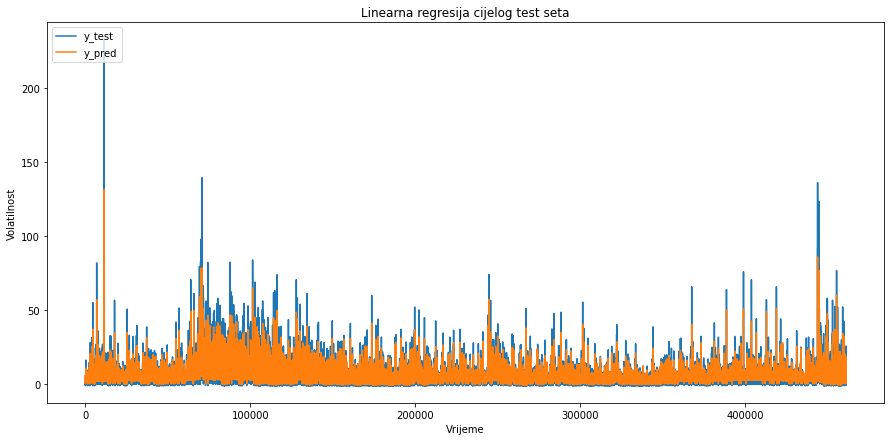

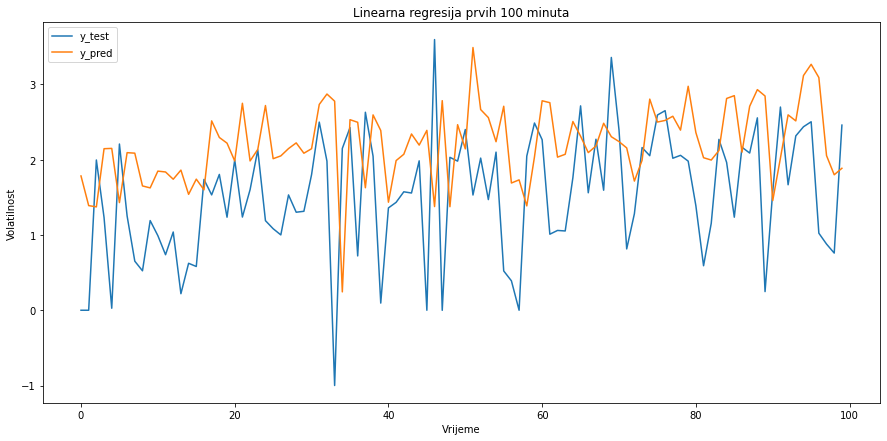

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	LOGISTIČKA REGRESIJA
1 . za iznos velicine lookaheada 1 minuta.
y_test = [0 0 1 ... 1 1 1] 
 y_pred = [0 0 0 ... 1 1 1]
Accuracy Score of train:  0.8126027082457107
Accuracy Score:  0.8738691277568568
AUC:  0.528235476499962
F1:  0.9320069513510607


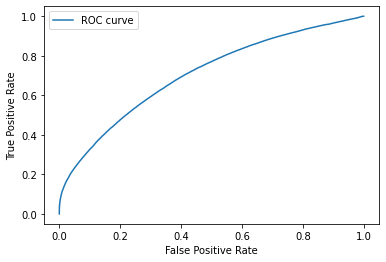

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
#Pristup di za svaku smislenu kombinaciju lookback i lookahead windowa treniram po jedan model svakim regresorom
#Imamo 6 kombinacija (3,2,1)

X_uk = [X_1T]
y_uk = [Y_1T]
#----------------Treniranje----------------
cnt = 0
for lookback_window in X_uk:
  for lookahead_window in y_uk:
      if(len(lookback_window)>=len(lookahead_window)):
        lookahead = round(len(lookback_window)/len(lookahead_window))
        if(len(lookback_window)>len(lookahead_window)):
          lookahead_window = pd.DataFrame(np.repeat(lookahead_window.values,lookahead, axis=0))
             
        X_train_temp, X_test_temp = np.split(lookback_window, [int(.8 *len(lookback_window))])
        y_train_temp, y_test_temp = np.split(lookahead_window, [int(.8 *len(lookahead_window))])
        X_test_temp = X_test_temp.reset_index(drop = True)
        y_test_temp = y_test_temp.reset_index(drop = True)

        scaler = StandardScaler().fit(X_train_temp)
        X_train_temp = scaler.transform(X_train_temp)
        X_test_temp = scaler.transform(X_test_temp)
        """
        print(X_train_temp)
        print(X_test_temp)
        print(y_train_temp)
        print(y_test_temp)
        print(' y_te =', y_test_temp, 'y_pred =', y_pred))
        """
        y_train_real = y_train_temp.iloc[:,0]
        y_test_real = y_test_temp.iloc[:,0]
        y_train_10 = y_train_temp.iloc[:,1]
        y_test_10 = y_test_temp.iloc[:,1]

        
        cnt+=1
        #LINEARNA REGRESIJA
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        print('\tLINEARNA REGRESIJA')
        linreg = LinearRegression()

        X2 = sm.add_constant(X_train_temp)
        est = sm.OLS(y_train_real, X2)
        est2 = est.fit()
        print(est2.summary())

        linreg.fit(X_train_temp, y_train_real)
        y_pred_train = linreg.predict(X_train_temp)
        y_pred = linreg.predict(X_test_temp)
        
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija cijelog test seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija prvih 100 minuta')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #LOGISTIČKA REGRESIJA
        print('\n')
        print('\tLOGISTIČKA REGRESIJA')
        logreg = LogisticRegression()
        logreg.fit(X_train_temp ,y_train_10)
        y_pred_train = logreg.predict(X_train_temp)
        y_pred = logreg.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        metrics.plot_roc_curve(logreg, X_test_temp, y_test_10)
        plt.legend(['ROC curve'], loc='upper left')
        plt.show()
        """
        plt.figure(figsize=(30,16))
        plt.title('Logistička regresija')
        plt.plot(np.arange(len(y_test_10)), y_test_10*5)
        plt.plot(np.arange(len(y_test_10)), y_pred*5)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        """
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
     

# Models with 30 minute lookback for 10 minute lookahead

,Close/VWAP,Volume,NumberOfTrades,VWAP/Close,Spread/Close,Spread30,Spread10,Spread5,Volatility30,Volatility10,Volatility5,ReturnCO,ReturnCC5,ReturnCC10,ReturnCC,ReturnVW
0,0.991957,1.223542e+06,1075,27.794935,16.321276,1.39,3.39,6.58,0.476355,0.0,1.430808,-0.028078,-0.004160,-0.008898,450.000000,453.648796
1,0.981808,1.019016e+06,966,22.392206,20.126139,-0.09,6.80,6.76,0.739262,0.0,3.443796,-0.036013,-0.023310,-0.016733,-0.016733,-0.006569
2,0.948741,2.144708e+06,1925,9.809524,44.269176,-12.81,-8.18,11.00,2.115410,0.0,6.524044,-0.085420,-0.050691,-0.068863,-0.068863,-0.036411
3,0.992576,3.233765e+06,2561,8.196561,51.562794,-27.24,8.00,17.18,2.066711,0.0,1.385179,-0.067778,0.003589,0.018204,0.018204,-0.026763
4,1.006739,3.651155e+06,2852,10.577651,39.911040,9.71,18.71,14.70,2.024778,0.0,2.145640,-0.039460,-0.022921,0.013135,0.013135,-0.001118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230621,0.997316,3.161990e+06,796,49.731928,136.075228,-16.14,-31.15,39.54,3.942784,0.0,15.896131,-0.007643,0.001771,-0.006046,-0.006046,-0.008535
230622,1.004173,2.738005e+06,727,50.017022,135.146096,8.49,92.46,60.48,4.905430,0.0,17.367329,-0.000621,0.005663,0.005733,0.005733,-0.001135
230623,0.997774,2.883456e+06,707,72.750919,92.666306,39.32,20.07,16.03,5.230311,0.0,9.631223,-0.007444,-0.001102,-0.009025,-0.009025,-0.002670
230624,0.996764,1.540027e+06,464,76.925172,87.683709,6.70,33.62,26.34,4.986618,0.0,6.381076,-0.003356,-0.000495,-0.000489,-0.000489,0.000523


,Volatility,Volatility10
0,3.525250,1
1,7.445793,1
2,4.892246,1
3,4.856807,1
4,3.591615,1
...,...,...
230621,15.600310,1
230622,21.341527,1
230623,10.625985,1
230624,10.038215,1


        Volatility  Volatility10
0         3.525250             1
1         7.445793             1
2         4.892246             1
3         4.856807             1
4         3.591615             1
...            ...           ...
184495    4.395625             1
184496    5.787191             1
184497    7.523386             1
184498    4.159449             1
184499    3.642232             1

[184500 rows x 2 columns]
0         1
1         1
2         1
3         1
4         1
         ..
184495    1
184496    1
184497    1
184498    1
184499    1
Name: Volatility10, Length: 184500, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
	LINEARNA REGRESIJA
                            OLS Regression Results                            
Dep. Variable:             Volatility   R-squared:                       0

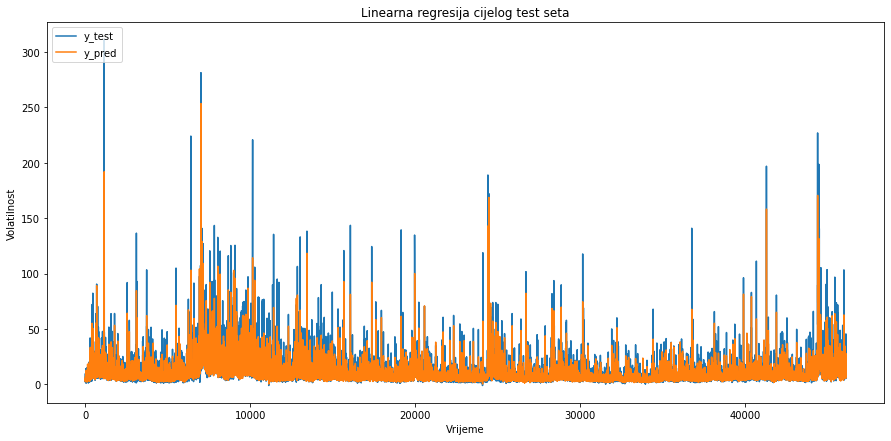

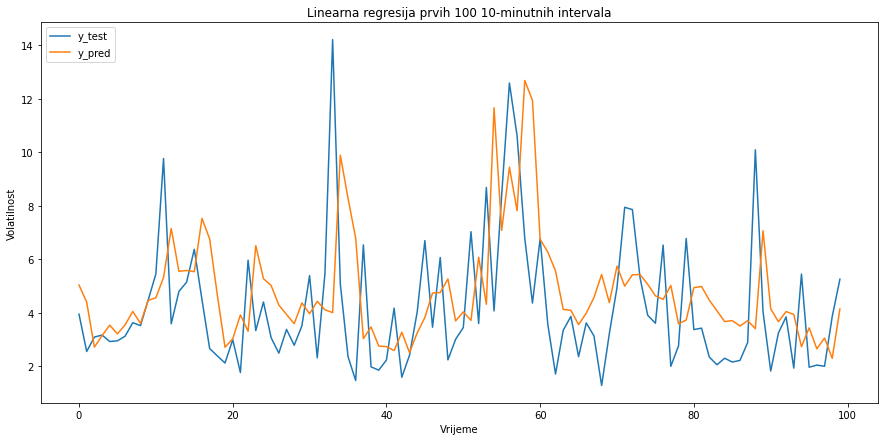

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	LOGISTIČKA REGRESIJA
y_test = [1 0 0 ... 1 1 1] 
 y_pred = [1 1 0 ... 1 1 1]
Accuracy Score of train:  0.8882168021680217
Accuracy Score:  0.8978016736764515
AUC:  0.7381556322642728
F1:  0.9443867679675334


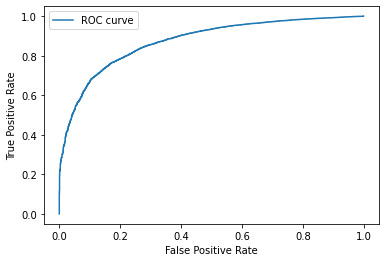

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	RF KLASIFIKACIJA
y_test = [1 0 0 ... 1 1 1] 
 y_pred = [1 1 0 ... 1 1 1]
Accuracy Score of train:  0.8967371273712738
Accuracy Score:  0.9352425963664744
AUC:  0.641943974099537
F1:  0.9659449783949562


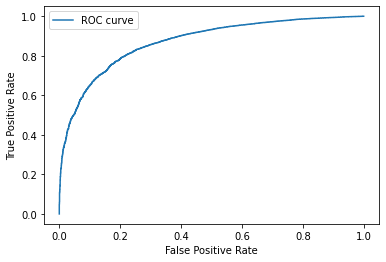

No handles with labels found to put in legend.


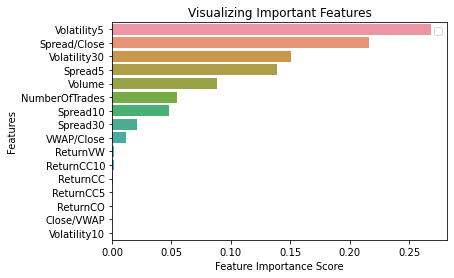

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	LightGBM
184500 184500
(46126, 16) 46126
[1]	valid_0's l1: 5.2638	valid_0's l2: 119.702
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 5.06402	valid_0's l2: 113.487
[3]	valid_0's l1: 4.88606	valid_0's l2: 107.969
[4]	valid_0's l1: 4.73402	valid_0's l2: 103.2
[5]	valid_0's l1: 4.59035	valid_0's l2: 98.7748
[6]	valid_0's l1: 4.46229	valid_0's l2: 94.849
[7]	valid_0's l1: 4.35342	valid_0's l2: 91.3636
[8]	valid_0's l1: 4.25873	valid_0's l2: 88.2815
[9]	valid_0's l1: 4.17938	valid_0's l2: 85.5388
[10]	valid_0's l1: 4.10876	valid_0's l2: 83.0718
[11]	valid_0's l1: 4.04939	valid_0's l2: 80.8545
[12]	valid_0's l1: 3.99758	valid_0's l2: 78.8172
[13]	valid_0's l1: 3.95635	valid_0's l2: 77.0419
[14]	valid_0's l1: 3.92316	valid_0's l2: 75.4935

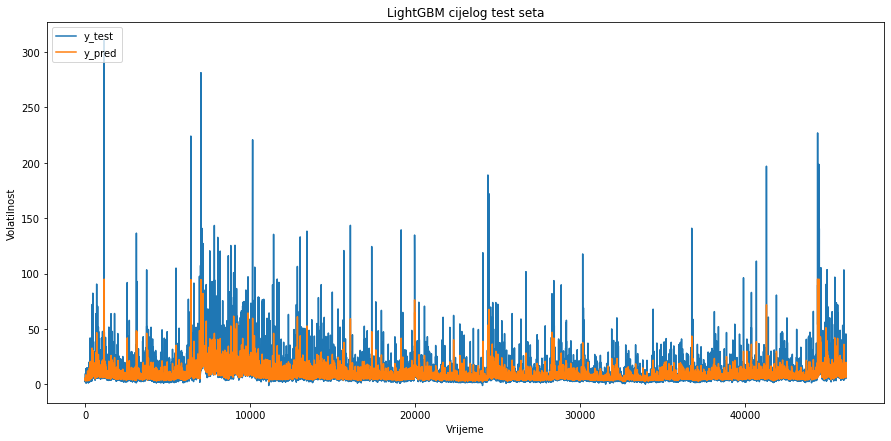

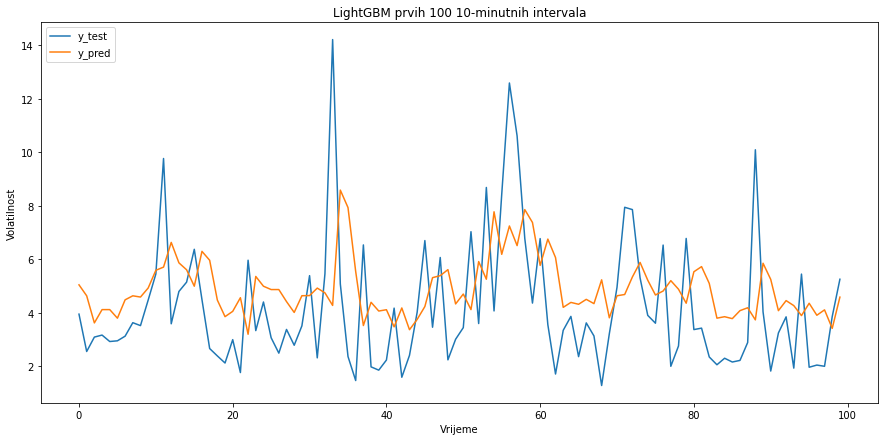

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [ ]:
X_30T = pd.read_csv('/content/drive/My Drive/dipl/final.csv', delimiter=',', header=0)
Y_10T = pd.read_csv('/content/drive/My Drive/dipl/target.csv', delimiter=',', header=0)
X_30T.replace([np.inf, -np.inf], np.nan, inplace=True)
Y_10T.replace([np.inf, -np.inf], np.nan, inplace=True)
X_30T = X_30T.fillna(0)
Y_10T = Y_10T.fillna(0)
X_30T = X_30T.reset_index()
Y_10T = Y_10T.reset_index()
X_30T = X_30T.loc[: , 'Close/VWAP' : 'ReturnVW']
Y_10T = Y_10T.loc[: , 'Volatility' : 'Volatility10']

X_30T.drop(X_30T.tail(1).index, inplace=True)
Y_10T.drop(Y_10T.tail(1).index, inplace=True)

display(X_30T)
display(Y_10T)
#np.isfinite(X_30T).all(1)

X_uk = [X_30T]
y_uk = [Y_10T]
#----------------Treniranje----------------
cnt = 0
for lookback_window in X_uk:
  for lookahead_window in y_uk:
      if(len(lookback_window)>=len(lookahead_window)):
        lookahead = round(len(lookback_window)/len(lookahead_window))
        if(len(lookback_window)>len(lookahead_window)):
          lookahead_window = pd.DataFrame(np.repeat(lookahead_window.values,lookahead, axis=0))
             
        X_train_temp, X_test_temp = np.split(lookback_window, [int(.8 *len(lookback_window))])
        y_train_temp, y_test_temp = np.split(lookahead_window, [int(.8 *len(lookahead_window))])
        X_test_temp = X_test_temp.reset_index(drop = True)
        y_test_temp = y_test_temp.reset_index(drop = True)
        
        scaler = StandardScaler().fit(X_train_temp)
        X_train_temp = scaler.transform(X_train_temp)
        X_test_temp = scaler.transform(X_test_temp)
        """
        print(X_train_temp)
        print(X_test_temp)
        print(y_train_temp)
        print(y_test_temp)
        print(' y_te =', y_test_temp, 'y_pred =', y_pred))
        """
        print(y_train_temp)
        y_train_real = y_train_temp.iloc[:,0]
        y_test_real = y_test_temp.iloc[:,0]
        y_train_10 = y_train_temp.iloc[:,1]
        y_test_10 = y_test_temp.iloc[:,1]
        print(y_train_10)
        
        cnt+=1
        #LINEARNA REGRESIJA
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        print('\tLINEARNA REGRESIJA')
        linreg = LinearRegression()
        X2 = sm.add_constant(X_train_temp)
        est = sm.OLS(y_train_real, X2)
        est2 = est.fit()
        print(est2.summary())
        linreg.fit(X_train_temp, y_train_real)
        y_pred_train = linreg.predict(X_train_temp)
        y_pred = linreg.predict(X_test_temp)
        
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2 train: ', r2_score(y_train_real, y_pred_train))
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija cijelog test seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija prvih 100 10-minutnih intervala')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

        #LOGISTIČKA REGRESIJA
        print('\n')
        print('\tLOGISTIČKA REGRESIJA')
        logreg = LogisticRegression()
        logreg.fit(X_train_temp ,y_train_10)
        y_pred_train = logreg.predict(X_train_temp)
        y_pred = logreg.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        metrics.plot_roc_curve(logreg, X_test_temp, y_test_10)
        plt.legend(['ROC curve'], loc='upper left')
        plt.show()
        """
        plt.figure(figsize=(30,16))
        plt.title('Logistička regresija')
        plt.plot(np.arange(len(y_test_10)), y_test_10*5)
        plt.plot(np.arange(len(y_test_10)), y_pred*5)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        """
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        """
        #GAUSSIAN NB KLASIFIKACIJA
        print('\n')
        print('\tGAUSSIAN NB KLASIFIKACIJA')
        gnb = GaussianNB()
        gnb.fit(X_train_temp ,y_train_10)
        y_pred_train = gnb.predict(X_train_temp)
        y_pred = gnb.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        metrics.plot_roc_curve(gnb, X_test_temp, y_test_10)
        plt.legend(['ROC curve'], loc='upper left')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        """
        #RandomForest
        print('\n')
        print('\tRF KLASIFIKACIJA')
        rfc = RandomForestClassifier(n_estimators=200, max_depth=3)
        rfc.fit(X_train_temp ,y_train_10)
        y_pred_train = rfc.predict(X_train_temp)
        y_pred = rfc.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        metrics.plot_roc_curve(rfc, X_test_temp, y_test_10)
        plt.legend(['ROC curve'], loc='upper left')
        plt.show()
        
        pom = []
        for col in X_30T.columns: 
          pom.append(col) 

        feature_imp = pd.Series(rfc.feature_importances_, index=pom).sort_values(ascending=False)
        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title("Visualizing Important Features")
        plt.legend()
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #LightGBM
        print('\n')
        print('\tLightGBM')
        print(len(X_train_temp), len(y_train_real))
        if(len(lookback_window)>len(lookahead_window)):
          X_test_temp = np.delete(X_test_temp, len(X_test_temp)-1, axis=0)
        print(X_test_temp.shape, len(y_test_real))
        lgb_train = lgb.Dataset(X_train_temp, y_train_real)
        lgb_eval = lgb.Dataset(X_test_temp, y_test_real, reference=lgb_train)
        params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'l2', 'l1'},
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbose': 0
        }
        gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
        y_pred = gbm.predict(X_test_temp, num_iteration=gbm.best_iteration)

        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('LightGBM cijelog test seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('LightGBM prvih 100 10-minutnih intervala')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.show()
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        
        """
        E_train = [];
        E_tst = [];

        for i in [200]:
            RF = RandomForestClassifier(n_estimators = i+1).fit(X_train_temp, y_train_10)
            print(i)
            h_train = RF.predict(X_train_temp)
            h_tst = RF.predict(X_test_temp)
            
            E_train.append(zero_one_loss(y_train_10, h_train))
            E_tst.append(zero_one_loss(y_test_10, h_tst))

        min_E = min(E_tst)
        ind = E_tst.index(min_E)

        plt.figure(figsize=(15, 7))
        plt.plot(np.arange(1), E_train, label = 'E_train')
        plt.plot(np.arange(1), E_tst, label = 'E_tst')
        plt.scatter(np.arange(1)[ind], min_E, label = 'min pogreske testiranja')

        plt.legend(loc = 'best'); plt.xlabel('L'); plt.ylabel('Eor')
        plt.grid();
        print (E_train)
        print (E_tst)

        print('Minimum pogreske za testiranje => ', min_E)

        #KNN
        #Prvo probat za različit broj susjeda koji daje najmanju grešku :)
        knn = KNeighborsClassifier(n_neighbors=100)
        knn.fit(X_train_temp, y_train_10)
        y_pred_train = knn.predict(X_train_temp)
        y_pred = knn.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        
        for i in range(1, 40):
          knn = KNeighborsClassifier(n_neighbors=i)
          knn.fit(X_train_temp, y_train_10)
          pred_i = knn.predict(X_test_temp)
          error.append(np.mean(pred_i != y_test_10))
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
                markerfacecolor='blue', markersize=10)
        plt.title('Error Rate K Value')
        plt.xlabel('K Value')
        plt.ylabel('Mean Error')
        """

# 30-10 Volatility added tree visualization, optimized depth, added nn classification and regression, feature selection, checked for bias mistake

,Volume,NumberOfTrades,Spread/Close,Spread30,Spread10,Spread5,Volatility30,Volatility5,ReturnCC10,ReturnCC,ReturnVW
0,1.223542e+06,1075,16.321276,1.39,3.39,6.58,0.476355,1.430808,-0.008898,450.000000,453.648796
1,1.019016e+06,966,20.126139,-0.09,6.80,6.76,0.739262,3.443796,-0.016733,-0.016733,-0.006569
2,2.144708e+06,1925,44.269176,-12.81,-8.18,11.00,2.115410,6.524044,-0.068863,-0.068863,-0.036411
3,3.233765e+06,2561,51.562794,-27.24,8.00,17.18,2.066711,1.385179,0.018204,0.018204,-0.026763
4,3.651155e+06,2852,39.911040,9.71,18.71,14.70,2.024778,2.145640,0.013135,0.013135,-0.001118
...,...,...,...,...,...,...,...,...,...,...,...
230621,3.161990e+06,796,136.075228,-16.14,-31.15,39.54,3.942784,15.896131,-0.006046,-0.006046,-0.008535
230622,2.738005e+06,727,135.146096,8.49,92.46,60.48,4.905430,17.367329,0.005733,0.005733,-0.001135
230623,2.883456e+06,707,92.666306,39.32,20.07,16.03,5.230311,9.631223,-0.009025,-0.009025,-0.002670
230624,1.540027e+06,464,87.683709,6.70,33.62,26.34,4.986618,6.381076,-0.000489,-0.000489,0.000523


,Volatility,Volatility10
0,3.525250,1
1,7.445793,1
2,4.892246,1
3,4.856807,1
4,3.591615,1
...,...,...
230621,15.600310,1
230622,21.341527,1
230623,10.625985,1
230624,10.038215,1


        Volatility  Volatility10
0         3.525250             1
1         7.445793             1
2         4.892246             1
3         4.856807             1
4         3.591615             1
...            ...           ...
184495    4.395625             1
184496    5.787191             1
184497    7.523386             1
184498    4.159449             1
184499    3.642232             1

[184500 rows x 2 columns]
0         1
1         1
2         1
3         1
4         1
         ..
184495    1
184496    1
184497    1
184498    1
184499    1
Name: Volatility10, Length: 184500, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
	LINEARNA REGRESIJA
                            OLS Regression Results                            
Dep. Variable:             Volatility   R-squared:                       0

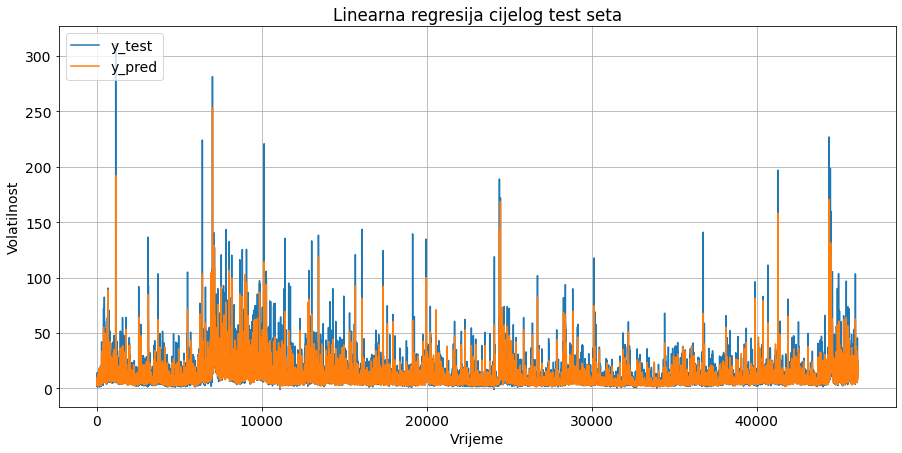

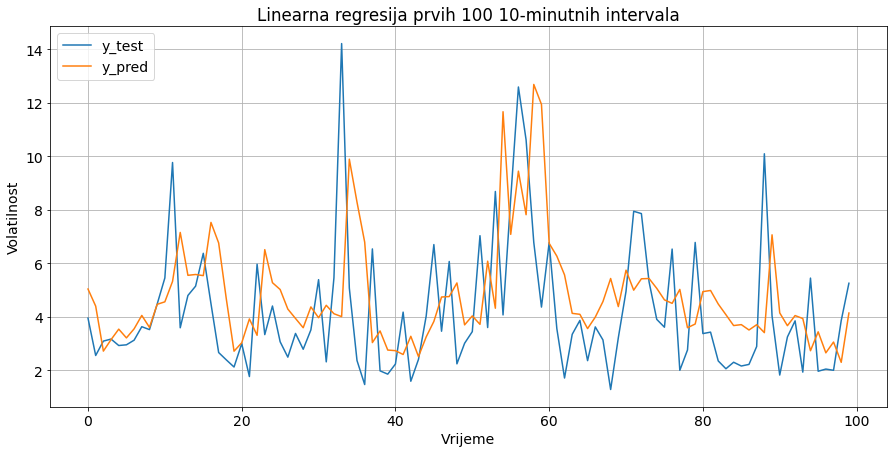

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	LOGISTIČKA REGRESIJA
y_test = [1 0 0 ... 1 1 1] 
 y_pred = [1 1 0 ... 1 1 1]
Accuracy Score of train:  0.8882276422764228
Accuracy Score:  0.8979967913974765
AUC:  0.7380685773961475
F1:  0.94450014744913
precision: [0.27736642 0.97340076]
recall: [0.55887097 0.91726619]
fscore: [0.37073693 0.94450015]


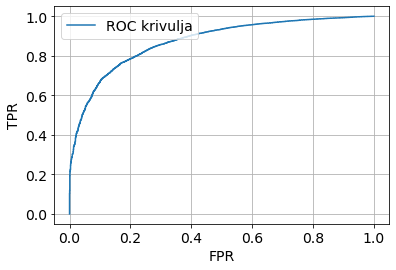

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	RF KLASIFIKACIJA
1 . za max_depth:  3 .
y_test = [1 0 0 ... 1 1 1] 
 y_pred = [1 1 0 ... 1 1 1]
Accuracy Score of train:  0.8970189701897019
Accuracy Score:  0.9341152495338855
AUC:  0.648764399205928
F1:  0.9653006930726985


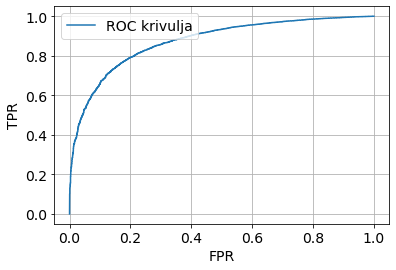

No handles with labels found to put in legend.


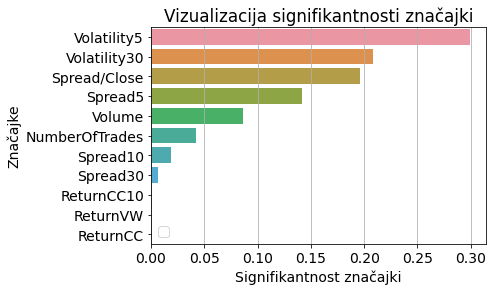

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	LightGBM
184500 184500
(46126, 11) 46126
[1]	valid_0's l2: 119.56	valid_0's l1: 5.26048
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 113.217	valid_0's l1: 5.05526
[3]	valid_0's l2: 107.593	valid_0's l1: 4.87194
[4]	valid_0's l2: 102.603	valid_0's l1: 4.70701
[5]	valid_0's l2: 98.1633	valid_0's l1: 4.56372
[6]	valid_0's l2: 94.1783	valid_0's l1: 4.43598
[7]	valid_0's l2: 90.6707	valid_0's l1: 4.33009
[8]	valid_0's l2: 87.5366	valid_0's l1: 4.23453
[9]	valid_0's l2: 84.7771	valid_0's l1: 4.15573
[10]	valid_0's l2: 82.3198	valid_0's l1: 4.08789
[11]	valid_0's l2: 80.1356	valid_0's l1: 4.02976
[12]	valid_0's l2: 78.1995	valid_0's l1: 3.98117
[13]	valid_0's l2: 76.5398	valid_0's l1: 3.94309
[14]	valid_0's l2: 75.061	valid_0's l1: 3.911

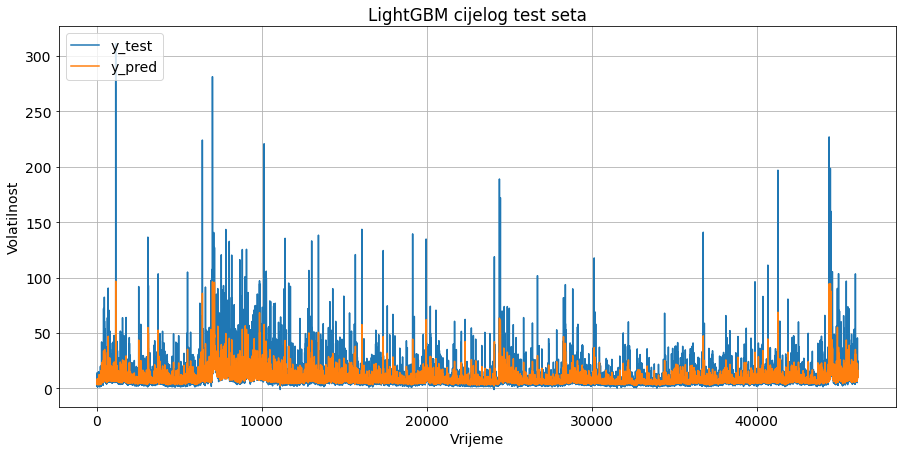

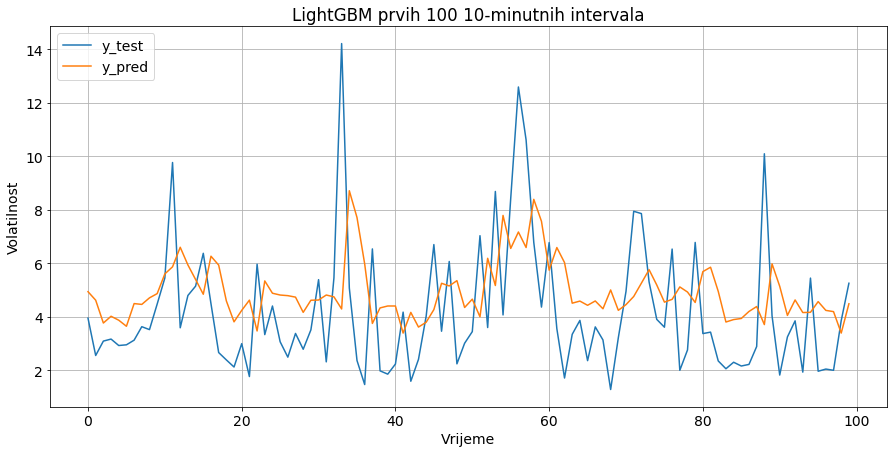

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	MLP NN REGRESIJA
y_test = [ 3.95566769  2.55987791  3.09785121 ... 10.6259852  10.03821472
 20.10802586] 
 y_pred = [ 4.71030439  4.11505066  2.8793415  ... 14.7934676  12.30963788
 11.16030982]
Accuracy RMSE of train:  5.969532730329076
Accuracy R2 train:  0.694631340510881
Accuracy R2:  0.3602133342036963
Accuracy RMSE:  8.190792677401172


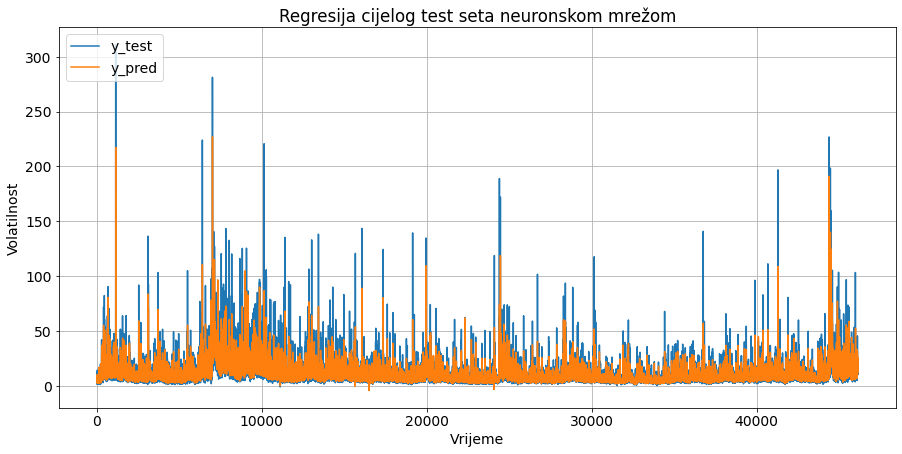

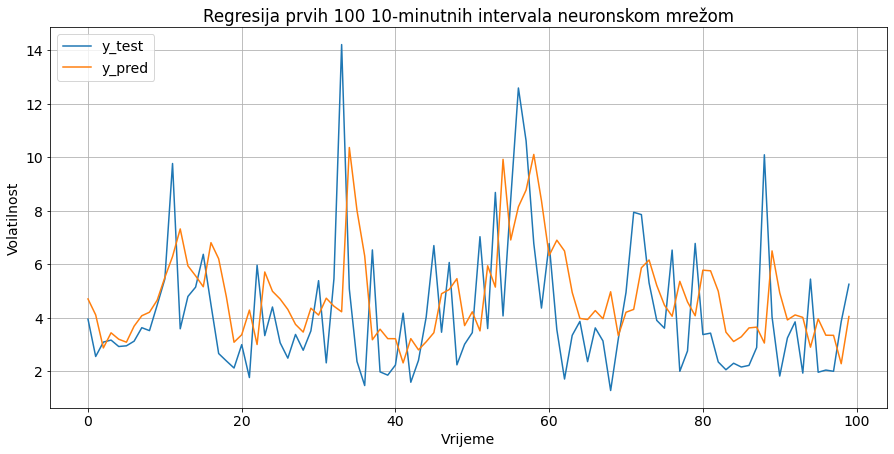

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	MLPClassifier (NN) KLASIFIKACIJA
y_test = [1 0 0 ... 1 1 1] 
 y_pred = [1 1 0 ... 1 1 1]
Accuracy Score of train:  0.8996043360433604
Accuracy Score:  0.9403156571131249
AUC:  0.6107766683714874
F1:  0.9330356128040587
precision: [0.40720598 0.95787706]
recall: [0.24153226 0.98002108]
fscore: [0.30321438 0.96882255]


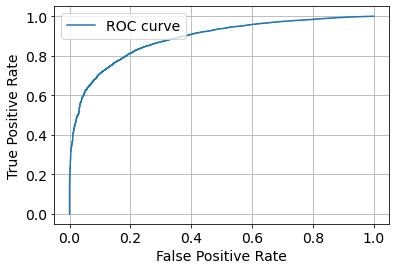

0        1
1        0
2        0
3        0
4        0
        ..
46121    1
46122    1
46123    1
46124    1
46125    1
Name: Volatility10, Length: 46126, dtype: int64
[1 1 0 ... 1 1 1]
184500   -0.001648
184501    0.001259
184502   -0.000719
184503   -0.000380
184504    0.000955
            ...   
230621   -0.006046
230622    0.005733
230623   -0.009025
230624   -0.000489
230625   -0.000489
Name: ReturnCC10, Length: 46126, dtype: float64


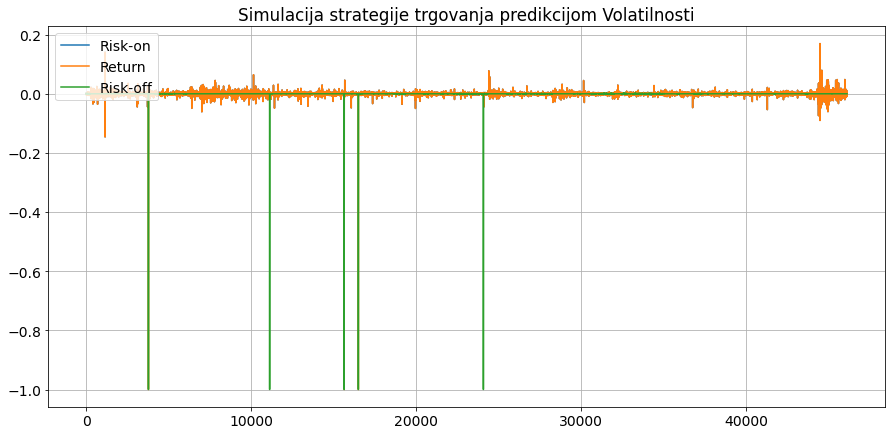

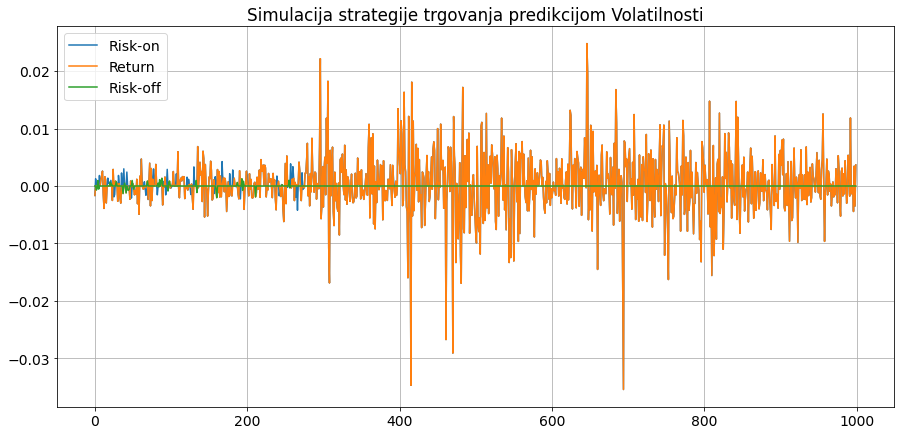

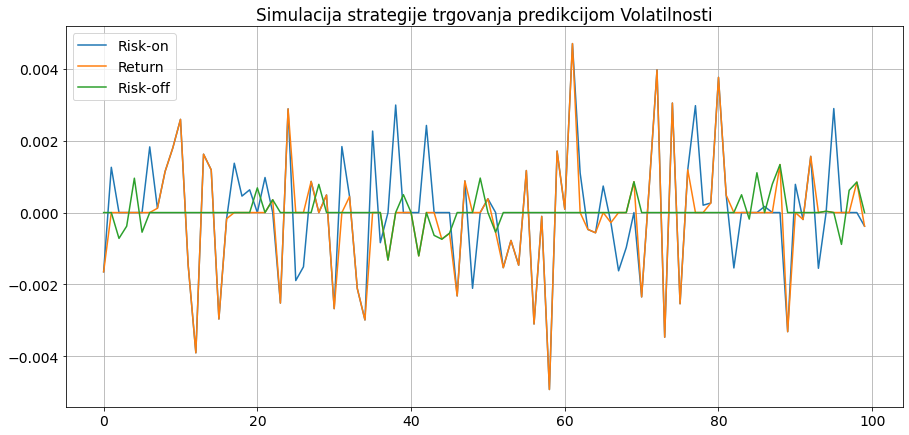

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [16]:
X_30T = pd.read_csv('/content/drive/My Drive/dipl/final.csv', delimiter=',', header=0)
Y_10T = pd.read_csv('/content/drive/My Drive/dipl/target.csv', delimiter=',', header=0)
X_30T.replace([np.inf, -np.inf], np.nan, inplace=True)
Y_10T.replace([np.inf, -np.inf], np.nan, inplace=True)
X_30T = X_30T.fillna(0)
Y_10T = Y_10T.fillna(0)
X_30T = X_30T.reset_index()
Y_10T = Y_10T.reset_index()


X_30T.drop(X_30T.tail(1).index, inplace=True)
Y_10T.drop(Y_10T.tail(1).index, inplace=True)
"""
Y_10T = Y_10T.iloc[3:]
Y_10T = Y_10T.reset_index(drop = True)
"""
X_30T = X_30T.loc[: , 'Close/VWAP' : 'ReturnVW']
Y_10T = Y_10T.loc[: , 'Volatility' : 'Volatility10']

#feature selection
insig_cols = [0, 3, 9, 11, 12]
X_30T.drop(X_30T.columns[insig_cols], axis=1, inplace=True)

display(X_30T)
display(Y_10T)
#np.isfinite(X_30T).all(1)

X_uk = [X_30T]
y_uk = [Y_10T]
#----------------Treniranje----------------
cnt = 0
for lookback_window in X_uk:
  for lookahead_window in y_uk:
      if(len(lookback_window)>=len(lookahead_window)):
        lookahead = round(len(lookback_window)/len(lookahead_window))
        if(len(lookback_window)>len(lookahead_window)):
          lookahead_window = pd.DataFrame(np.repeat(lookahead_window.values,lookahead, axis=0))
        return10 = lookback_window['ReturnCC10']
        temp, return10 = np.split(return10, [int(.8 *len(return10))])
        X_train_temp, X_test_temp = np.split(lookback_window, [int(.8 *len(lookback_window))])
        y_train_temp, y_test_temp = np.split(lookahead_window, [int(.8 *len(lookahead_window))])
        X_test_temp = X_test_temp.reset_index(drop = True)
        y_test_temp = y_test_temp.reset_index(drop = True)
        
        scaler = StandardScaler().fit(X_train_temp)
        X_train_temp = scaler.transform(X_train_temp)
        X_test_temp = scaler.transform(X_test_temp)
        """
        print(X_train_temp)
        print(X_test_temp)
        print(y_train_temp)
        print(y_test_temp)
        print(' y_te =', y_test_temp, 'y_pred =', y_pred))
        """
        print(y_train_temp)
        y_train_real = y_train_temp.iloc[:,0]
        y_test_real = y_test_temp.iloc[:,0]
        y_train_10 = y_train_temp.iloc[:,1]
        y_test_10 = y_test_temp.iloc[:,1]
        print(y_train_10)
        
        cnt+=1
        #LINEARNA REGRESIJA
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        print('\tLINEARNA REGRESIJA')
        linreg = LinearRegression()
        X2 = sm.add_constant(X_train_temp)
        est = sm.OLS(y_train_real, X2)
        est2 = est.fit()
        print(est2.summary())
        linreg.fit(X_train_temp, y_train_real)
        y_pred_train = linreg.predict(X_train_temp)
        y_pred = linreg.predict(X_test_temp)
        
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2 train: ', r2_score(y_train_real, y_pred_train))
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija cijelog test seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.savefig('8.svg')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija prvih 100 10-minutnih intervala')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.savefig('9.svg')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

        #LOGISTIČKA REGRESIJA
        print('\n')
        print('\tLOGISTIČKA REGRESIJA')
        logreg = LogisticRegression()
        logreg.fit(X_train_temp ,y_train_10)
        y_pred_train = logreg.predict(X_train_temp)
        y_pred = logreg.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        #print(y_test_10.value_counts())
        #print(y_pred.value_counts())
        precision, recall, fscore, support = precision_recall_fscore_support(y_test_10, y_pred)
        print('precision: {}'.format(precision))
        print('recall: {}'.format(recall))
        print('fscore: {}'.format(fscore))
        metrics.plot_roc_curve(logreg, X_test_temp, y_test_10)
        plt.legend(['ROC krivulja'], loc='upper left')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.savefig('14.svg')
        plt.show()
        """
        plt.figure(figsize=(30,16))
        plt.title('Logistička regresija')
        plt.plot(np.arange(len(y_test_10)), y_test_10*5)
        plt.plot(np.arange(len(y_test_10)), y_pred*5)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        """
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        """
        #GAUSSIAN NB KLASIFIKACIJA
        print('\n')
        print('\tGAUSSIAN NB KLASIFIKACIJA')
        gnb = GaussianNB()
        gnb.fit(X_train_temp ,y_train_10)
        y_pred_train = gnb.predict(X_train_temp)
        y_pred = gnb.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        metrics.plot_roc_curve(gnb, X_test_temp, y_test_10)
        plt.legend(['ROC curve'], loc='upper left')
        plt.show()
        
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        """
        #RandomForest
        print('\n')
        print('\tRF KLASIFIKACIJA')
        rfc = RandomForestClassifier(n_estimators=200, max_depth=3)
        rfc.fit(X_train_temp ,y_train_10)
        pom = []
        for col in X_30T.columns: 
          pom.append(col)
        #vizualizacija stabla odluke
        estimator = rfc.estimators_[1]
        from sklearn.tree import export_graphviz
        # Export as dot file
        export_graphviz(estimator, out_file='treeVolatility.dot', 
                        feature_names = pom,
                        class_names = [str(0), str(1)],
                        rounded = True, proportion = False, 
                        precision = 2, filled = True)

        # Convert to png using system command (requires Graphviz)
        from subprocess import call
        call(['dot', '-Tpng', 'treeVolatility.dot', '-o', 'treeVolatility.png', '-Gdpi=600'])
        # Display in jupyter notebook
        from IPython.display import Image
        Image(filename = 'treeVolatility.png')
        y_pred_train = rfc.predict(X_train_temp)
        y_pred = rfc.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za max_depth: ', str(3),'.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        metrics.plot_roc_curve(rfc, X_test_temp, y_test_10)
        plt.legend(['ROC krivulja'], loc='upper left')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.savefig('15.svg')
        plt.show()

        feature_imp = pd.Series(rfc.feature_importances_, index=pom).sort_values(ascending=False)
        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Signifikantnost značajki')
        plt.ylabel('Značajke')
        plt.title("Vizualizacija signifikantnosti značajki")
        plt.savefig('aa16.svg')
        plt.legend()
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #LightGBM
        print('\n')
        print('\tLightGBM')
        print(len(X_train_temp), len(y_train_real))
        if(len(lookback_window)>len(lookahead_window)):
          X_test_temp = np.delete(X_test_temp, len(X_test_temp)-1, axis=0)
        print(X_test_temp.shape, len(y_test_real))
        lgb_train = lgb.Dataset(X_train_temp, y_train_real)
        lgb_eval = lgb.Dataset(X_test_temp, y_test_real, reference=lgb_train)
        params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'l2', 'l1'},
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbose': 0
        }
        gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
        y_pred = gbm.predict(X_test_temp, num_iteration=gbm.best_iteration)

        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('LightGBM cijelog test seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.savefig('10.svg')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('LightGBM prvih 100 10-minutnih intervala')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.savefig('11.svg')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')


        print('\tMLP NN REGRESIJA')
        mlpreg = MLPRegressor(early_stopping=True)
        mlpreg.fit(X_train_temp, y_train_real)
        y_pred_train = mlpreg.predict(X_train_temp)
        y_pred = mlpreg.predict(X_test_temp)
        
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2 train: ', r2_score(y_train_real, y_pred_train))
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('Regresija cijelog test seta neuronskom mrežom')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.savefig('12.svg')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('Regresija prvih 100 10-minutnih intervala neuronskom mrežom')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Volatilnost')
        plt.savefig('13.svg')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #MLPClassifier (NN) KLASIFIKACIJA
        print('\n')
        print('\tMLPClassifier (NN) KLASIFIKACIJA')
        ovr = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5, early_stopping = True))
        ovr.fit(X_train_temp ,y_train_10)
        y_pred_train = ovr.predict(X_train_temp)
        y_pred = ovr.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred, average='weighted'))
        precision, recall, fscore, support = precision_recall_fscore_support(y_test_10, y_pred)
        print('precision: {}'.format(precision))
        print('recall: {}'.format(recall))
        print('fscore: {}'.format(fscore))
        metrics.plot_roc_curve(ovr, X_test_temp, y_test_10)
        plt.legend(['ROC curve'], loc='upper left')
        plt.show()

        true = y_test_10
        predicted = y_pred
        print(true)
        print(predicted)
        print(return10)
        
        #simulacija strategije
        return10 = return10.reset_index(drop = True)
        riskon = []
        riskof = []
        truereturn = []
        for i, prediction in enumerate(predicted):
          truereturn.append(true[i]*return10[i])
          if(prediction == 1):
            riskon.append(1*return10[i])
            riskof.append(0)
          if(prediction == 0):
            riskon.append(0)
            riskof.append(1*return10[i])
        plt.figure(figsize=(15,7))
        plt.title('Simulacija strategije trgovanja predikcijom Volatilnosti')
        plt.plot(np.arange(len(truereturn)), riskon)
        plt.plot(np.arange(len(truereturn)), truereturn)
        plt.plot(np.arange(len(truereturn)), riskof)
        plt.legend(['Risk-on', 'Return','Risk-off'], loc='upper left')
        plt.show()

        plt.figure(figsize=(15,7))
        plt.title('Simulacija strategije trgovanja predikcijom Volatilnosti')
        plt.plot(np.arange(1000), riskon[0:1000])
        plt.plot(np.arange(1000), truereturn[0:1000])
        plt.plot(np.arange(1000), riskof[0:1000])
        plt.legend(['Risk-on', 'Return','Risk-off'], loc='upper left')
        plt.savefig('16.svg')
        plt.show()

        plt.figure(figsize=(15,7))
        plt.title('Simulacija strategije trgovanja predikcijom Volatilnosti')
        plt.plot(np.arange(100), riskon[0:100])
        plt.plot(np.arange(100), truereturn[0:100])
        plt.plot(np.arange(100), riskof[0:100])
        plt.legend(['Risk-on', 'Return','Risk-off'], loc='upper left')
        plt.savefig('17.svg')
        plt.show()

        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        
        """
        E_train = [];
        E_tst = [];

        for i in [200]:
            RF = RandomForestClassifier(n_estimators = i+1).fit(X_train_temp, y_train_10)
            print(i)
            h_train = RF.predict(X_train_temp)
            h_tst = RF.predict(X_test_temp)
            
            E_train.append(zero_one_loss(y_train_10, h_train))
            E_tst.append(zero_one_loss(y_test_10, h_tst))

        min_E = min(E_tst)
        ind = E_tst.index(min_E)

        plt.figure(figsize=(15, 7))
        plt.plot(np.arange(1), E_train, label = 'E_train')
        plt.plot(np.arange(1), E_tst, label = 'E_tst')
        plt.scatter(np.arange(1)[ind], min_E, label = 'min pogreske testiranja')

        plt.legend(loc = 'best'); plt.xlabel('L'); plt.ylabel('Eor')
        plt.grid();
        print (E_train)
        print (E_tst)

        print('Minimum pogreske za testiranje => ', min_E)

        #KNN
        #Prvo probat za različit broj susjeda koji daje najmanju grešku :)
        knn = KNeighborsClassifier(n_neighbors=100)
        knn.fit(X_train_temp, y_train_10)
        y_pred_train = knn.predict(X_train_temp)
        y_pred = knn.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        
        for i in range(1, 40):
          knn = KNeighborsClassifier(n_neighbors=i)
          knn.fit(X_train_temp, y_train_10)
          pred_i = knn.predict(X_test_temp)
          error.append(np.mean(pred_i != y_test_10))
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
                markerfacecolor='blue', markersize=10)
        plt.title('Error Rate K Value')
        plt.xlabel('K Value')
        plt.ylabel('Mean Error')
        """

# Visualizing RF Tree and measuring performance in predicting Returns

,Close/VWAP,Volume,NumberOfTrades,VWAP/Close,Spread/Close,Spread30,Spread10,Spread5,Volatility30,Volatility10,Volatility5,ReturnCO,ReturnCC5,ReturnCC10,ReturnCC,ReturnVW
0,0.991957,1.223542e+06,1075,27.794935,16.321276,1.39,3.39,6.58,0.476355,0.0,1.430808,-0.028078,-0.004160,-0.008898,450.000000,453.648796
1,0.981808,1.019016e+06,966,22.392206,20.126139,-0.09,6.80,6.76,0.739262,0.0,3.443796,-0.036013,-0.023310,-0.016733,-0.016733,-0.006569
2,0.948741,2.144708e+06,1925,9.809524,44.269176,-12.81,-8.18,11.00,2.115410,0.0,6.524044,-0.085420,-0.050691,-0.068863,-0.068863,-0.036411
3,0.992576,3.233765e+06,2561,8.196561,51.562794,-27.24,8.00,17.18,2.066711,0.0,1.385179,-0.067778,0.003589,0.018204,0.018204,-0.026763
4,1.006739,3.651155e+06,2852,10.577651,39.911040,9.71,18.71,14.70,2.024778,0.0,2.145640,-0.039460,-0.022921,0.013135,0.013135,-0.001118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230621,0.997316,3.161990e+06,796,49.731928,136.075228,-16.14,-31.15,39.54,3.942784,0.0,15.896131,-0.007643,0.001771,-0.006046,-0.006046,-0.008535
230622,1.004173,2.738005e+06,727,50.017022,135.146096,8.49,92.46,60.48,4.905430,0.0,17.367329,-0.000621,0.005663,0.005733,0.005733,-0.001135
230623,0.997774,2.883456e+06,707,72.750919,92.666306,39.32,20.07,16.03,5.230311,0.0,9.631223,-0.007444,-0.001102,-0.009025,-0.009025,-0.002670
230624,0.996764,1.540027e+06,464,76.925172,87.683709,6.70,33.62,26.34,4.986618,0.0,6.381076,-0.003356,-0.000495,-0.000489,-0.000489,0.000523


,Return,Return10
0,-0.016733,-1
1,-0.068863,-1
2,0.018204,1
3,0.013135,1
4,0.006800,1
...,...,...
230621,0.005733,1
230622,-0.009025,-1
230623,-0.000489,0
230624,0.003867,1


          Return  Return10
0      -0.016733        -1
1      -0.068863        -1
2       0.018204         1
3       0.013135         1
4       0.006800         1
...          ...       ...
184495 -0.001296        -1
184496 -0.002160        -1
184497 -0.001184        -1
184498  0.001546         1
184499 -0.001648        -1

[184500 rows x 2 columns]
0        -1
1        -1
2         1
3         1
4         1
         ..
184495   -1
184496   -1
184497   -1
184498    1
184499   -1
Name: Return10, Length: 184500, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
	LINEARNA REGRESIJA
                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                

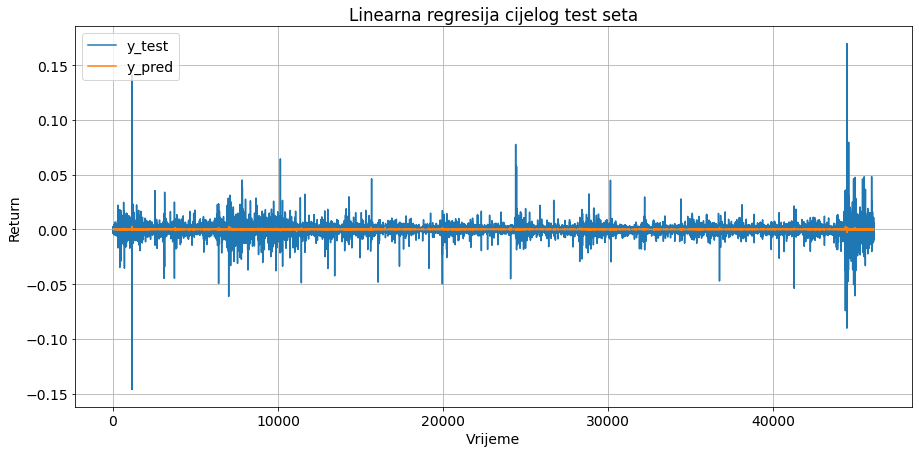

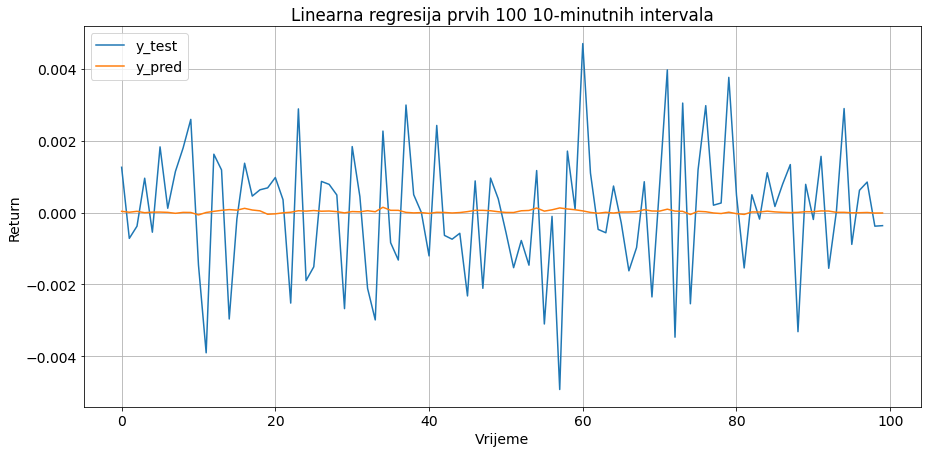

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	LOGISTIČKA REGRESIJA
1 . za iznos velicine lookaheada 1 minuta.
y_test = [ 1 -1  0 ...  0  1 -1] 
 y_pred = [1 1 0 ... 1 1 1]
Accuracy Score of train:  0.42101355013550135
Accuracy Score:  0.37878853574990246
F1:  0.2662374826468825
precision: [0.48430493 0.40733477 0.37404204]
recall: [0.0128671  0.16643962 0.90029656]
fscore: [0.02506818 0.23631812 0.52850751]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	OVR LOGREG KLASIFIKACIJA
1 . za iznos velicine lookaheada 1 minuta.
y_test = [ 1 -1  0 ...  0  1 -1] 
 y_pred = [1 1 0 ... 1 1 1]
Accuracy Score of train:  0.4217886178861789
Accuracy

No handles with labels found to put in legend.


1 . za iznos velicine lookaheada 1 minuta.
y_test = [ 1 -1  0 ...  0  1 -1] 
 y_pred = [ 1 -1  0 ...  1  1  1]
Accuracy Score of train:  0.4738319783197832
Accuracy Score:  0.42418592550839007
F1:  0.4165200505864276


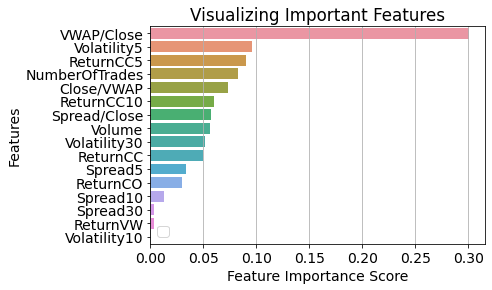

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	LightGBM
184500 184500
(46126, 16) 46126
[1]	valid_0's l2: 1.62247e-05	valid_0's l1: 0.00214907
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l2: 1.6218e-05	valid_0's l1: 0.00214794
[3]	valid_0's l2: 1.62181e-05	valid_0's l1: 0.00214713
[4]	valid_0's l2: 1.62175e-05	valid_0's l1: 0.00214663
[5]	valid_0's l2: 1.6217e-05	valid_0's l1: 0.00214605
[6]	valid_0's l2: 1.62206e-05	valid_0's l1: 0.00214543
[7]	valid_0's l2: 1.62234e-05	valid_0's l1: 0.00214485
[8]	valid_0's l2: 1.62219e-05	valid_0's l1: 0.00214445
[9]	valid_0's l2: 1.62209e-05	valid_0's l1: 0.00214396
[10]	valid_0's l2: 1.62252e-05	valid_0's l1: 0.00214357
Early stopping, best iteration is:
[5]	valid_0's l2: 1.6217e-05	valid_0's l1: 0.00214605
1 . za iznos velicine lookaheada 1

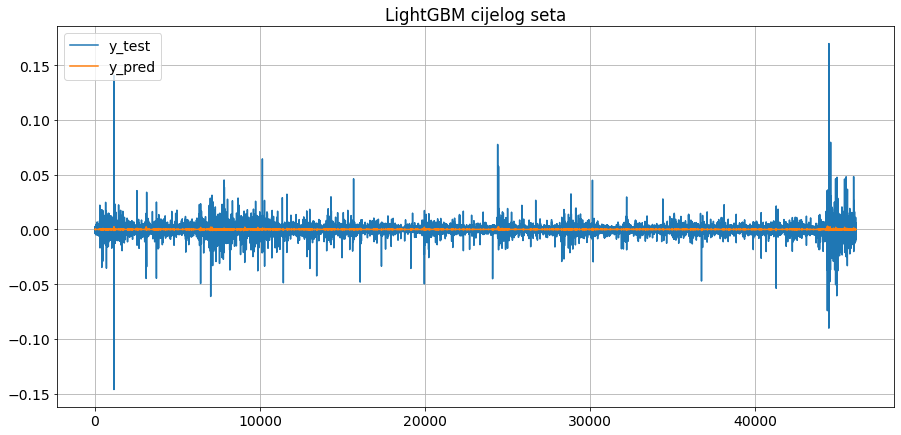

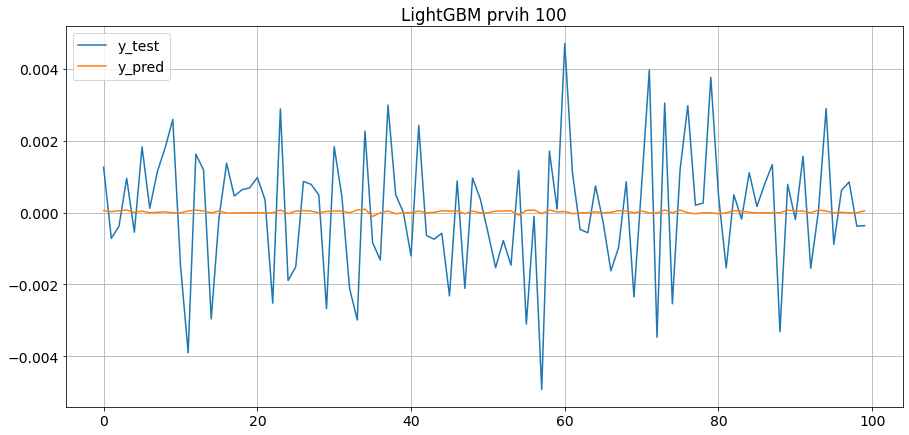

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
	MLP NN REGRESIJA
1 . za iznos velicine lookaheada 1 minuta.
y_test = [ 0.00125885 -0.00071891 -0.00037961 ... -0.00048911  0.00386717
 -0.01037743] 
 y_pred = [0.00025363 0.00025363 0.00025363 ... 0.00058868 0.00052062 0.00052672]
Accuracy RMSE of train:  0.016219876390508182
Accuracy R2 train:  -16.752011050257448
Accuracy R2:  -0.02427196716842861
Accuracy RMSE:  0.004077550467964856


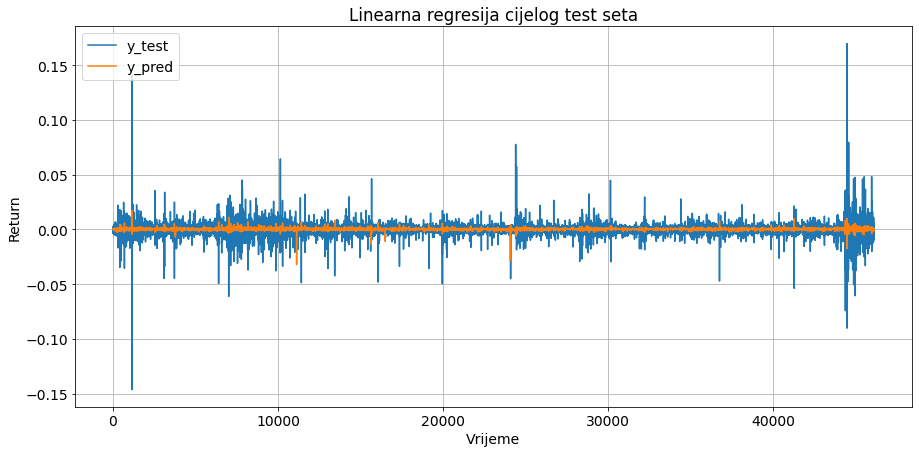

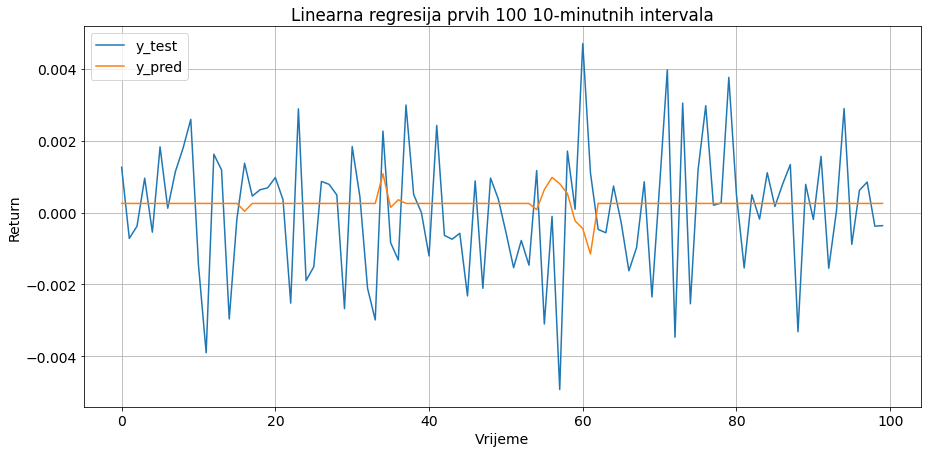

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	OVR MLPClassifier (NN) KLASIFIKACIJA
1 . za iznos velicine lookaheada 1 minuta.
y_test = [ 1 -1  0 ...  0  1 -1] 
 y_pred = [ 1 -1  0 ...  1  1  1]
Accuracy Score of train:  0.4778590785907859
Accuracy Score:  0.4223214672852621
F1:  0.41246194213035314
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [17]:
X_30T = pd.read_csv('/content/drive/My Drive/dipl/final.csv', delimiter=',', header=0)
Y_10T = pd.read_csv('/content/drive/My Drive/dipl/targetReturn.csv', delimiter=',', header=0)
X_30T.replace([np.inf, -np.inf], np.nan, inplace=True)

X_30T = X_30T.fillna(0)

X_30T = X_30T.reset_index()

X_30T = X_30T.loc[: , 'Close/VWAP' : 'ReturnVW']
Y_10T = Y_10T.loc[: , 'Return' : 'Return10']

X_30T.drop(X_30T.tail(1).index, inplace=True)
Y_10T.drop(Y_10T.tail(1).index, inplace=True)

display(X_30T)
display(Y_10T)

X_uk = [X_30T]
y_uk = [Y_10T]
#----------------Treniranje----------------
cnt = 0
for lookback_window in X_uk:
  for lookahead_window in y_uk:
      if(len(lookback_window)>=len(lookahead_window)):
        lookahead = round(len(lookback_window)/len(lookahead_window))
        if(len(lookback_window)>len(lookahead_window)):
          lookahead_window = pd.DataFrame(np.repeat(lookahead_window.values,lookahead, axis=0))
             
        X_train_temp, X_test_temp = np.split(lookback_window, [int(.8 *len(lookback_window))])
        y_train_temp, y_test_temp = np.split(lookahead_window, [int(.8 *len(lookahead_window))])
        X_test_temp = X_test_temp.reset_index(drop = True)
        y_test_temp = y_test_temp.reset_index(drop = True)
        
        scaler = StandardScaler().fit(X_train_temp)
        X_train_temp = scaler.transform(X_train_temp)
        X_test_temp = scaler.transform(X_test_temp)
        """
        print(X_train_temp)
        print(X_test_temp)
        print(y_train_temp)
        print(y_test_temp)
        print(' y_te =', y_test_temp, 'y_pred =', y_pred))
        """
        print(y_train_temp)
        y_train_real = y_train_temp.iloc[:,0]
        y_test_real = y_test_temp.iloc[:,0]
        y_train_10 = y_train_temp.iloc[:,1]
        y_test_10 = y_test_temp.iloc[:,1]
        print(y_train_10)
        
        cnt+=1
        #LINEARNA REGRESIJA
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        print('\tLINEARNA REGRESIJA')
        linreg = LinearRegression()
        X2 = sm.add_constant(X_train_temp)
        est = sm.OLS(y_train_real, X2)
        est2 = est.fit()
        print(est2.summary())
        linreg.fit(X_train_temp, y_train_real)
        y_pred_train = linreg.predict(X_train_temp)
        y_pred = linreg.predict(X_test_temp)
        
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija cijelog test seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Return')
        plt.savefig('18.svg')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija prvih 100 10-minutnih intervala')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Return')
        plt.savefig('19.svg')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

        #LOGISTIČKA REGRESIJA
        print('\n')
        print('\tLOGISTIČKA REGRESIJA')
        logreg = LogisticRegression(multi_class='multinomial')
        logreg.fit(X_train_temp ,y_train_10)
        y_pred_train = logreg.predict(X_train_temp)
        y_pred = logreg.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        #print('AUC: ', roc_auc_score(y_test_10, y_pred, multi_class='ovr'))
        print('F1: ', f1_score(y_test_10, y_pred, average='weighted'))
        precision, recall, fscore, support = precision_recall_fscore_support(y_test_10, y_pred)
        print('precision: {}'.format(precision))
        print('recall: {}'.format(recall))
        print('fscore: {}'.format(fscore))
        #metrics.plot_roc_curve(logreg, X_test_temp, y_test_10)
        #plt.legend(['ROC curve'], loc='upper left')
        #plt.show()
        """
        plt.figure(figsize=(30,16))
        plt.title('Logistička regresija')
        plt.plot(np.arange(len(y_test_10)), y_test_10*5)
        plt.plot(np.arange(len(y_test_10)), y_pred*5)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        #OVR SVM KLASIFIKACIJA
        print('\n')
        print('\tOVR SVM KLASIFIKACIJA')
        ovr = OneVsRestClassifier(SVC())
        ovr.fit(X_train_temp ,y_train_10)
        y_pred_train = ovr.predict(X_train_temp)
        y_pred = ovr.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        """
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #OVR LOGREG KLASIFIKACIJA
        print('\n')
        print('\tOVR LOGREG KLASIFIKACIJA')
        ovr = OneVsRestClassifier(LogisticRegression())
        ovr.fit(X_train_temp ,y_train_10)
        y_pred_train = ovr.predict(X_train_temp)
        y_pred = ovr.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        precision, recall, fscore, support = precision_recall_fscore_support(y_test_10, y_pred)
        print('precision: {}'.format(precision))
        print('recall: {}'.format(recall))
        print('fscore: {}'.format(fscore))
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        """
        #OVR MultinomialNB KLASIFIKACIJA
        print('\n')
        print('\tOVR MultinomialNB KLASIFIKACIJA')
        ovr = OneVsRestClassifier(MultinomialNB())
        ovr.fit(X_train_temp ,y_train_10)
        y_pred_train = ovr.predict(X_train_temp)
        y_pred = ovr.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        """
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #GAUSSIAN NB KLASIFIKACIJA
        print('\n')
        print('\tGAUSSIAN NB KLASIFIKACIJA')
        gnb = GaussianNB()
        gnb.fit(X_train_temp ,y_train_10)
        y_pred_train = gnb.predict(X_train_temp)
        y_pred = gnb.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        #print('AUC: ', roc_auc_score(y_test_10, y_pred, multi_class='ovr'))
        print('F1: ', f1_score(y_test_10, y_pred, average='weighted'))
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #XGBOOST KLASIFIKACIJA
        print('\n')
        print('\tXGBOOST KLASIFIKACIJA')
        xgb = OneVsRestClassifier(XGBClassifier())
        xgb.fit(X_train_temp ,y_train_10)
        y_pred_train = xgb.predict(X_train_temp)
        y_pred = xgb.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        #print('AUC: ', roc_auc_score(y_test_10, y_pred, multi_class='ovr'))
        print('F1: ', f1_score(y_test_10, y_pred, average='weighted'))
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

        #RandomForest
        print('\n')
        print('\tRF KLASIFIKACIJA')
        rfc = RandomForestClassifier(n_estimators=200, max_depth = 5)
        pom = []
        for col in X_30T.columns: 
          pom.append(col) 
        rfc.fit(X_train_temp ,y_train_10)
        #vizualizacija stabla odluke
        estimator = rfc.estimators_[1]
        from sklearn.tree import export_graphviz
        # Export as dot file
        export_graphviz(estimator, out_file='tree.dot', 
                        feature_names = pom,
                        class_names = [str(-1), str(0), str(1)],
                        rounded = True, proportion = False, 
                        precision = 2, filled = True)

        # Convert to png using system command (requires Graphviz)
        from subprocess import call
        call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
        # Display in jupyter notebook
        from IPython.display import Image
        Image(filename = 'tree.png')

        y_pred_train = rfc.predict(X_train_temp)
        y_pred = rfc.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        #print('AUC: ', roc_auc_score(y_test_10, y_pred, multi_class='ovr'))
        print('F1: ', f1_score(y_test_10, y_pred, average='weighted'))
        
        feature_imp = pd.Series(rfc.feature_importances_, index=pom).sort_values(ascending=False)
        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title("Visualizing Important Features")
        plt.legend()
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #LightGBM
        print('\n')
        print('\tLightGBM')
        print(len(X_train_temp), len(y_train_real))
        if(len(lookback_window)>len(lookahead_window)):
          X_test_temp = np.delete(X_test_temp, len(X_test_temp)-1, axis=0)
        print(X_test_temp.shape, len(y_test_real))
        lgb_train = lgb.Dataset(X_train_temp, y_train_real)
        lgb_eval = lgb.Dataset(X_test_temp, y_test_real, reference=lgb_train)
        params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'l2', 'l1'},
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbose': 0
        }
        gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
        y_pred = gbm.predict(X_test_temp, num_iteration=gbm.best_iteration)

        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('LightGBM cijelog seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('LightGBM prvih 100')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.savefig('20.svg')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        print('\tMLP NN REGRESIJA')
        mlpreg = MLPRegressor(early_stopping=True)
        mlpreg.fit(X_train_temp, y_train_real)
        y_pred_train = mlpreg.predict(X_train_temp)
        y_pred = mlpreg.predict(X_test_temp)
        
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2 train: ', r2_score(y_train_real, y_pred_train))
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija cijelog test seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Return')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija prvih 100 10-minutnih intervala')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.xlabel('Vrijeme')
        plt.ylabel('Return')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
 

        #OVR MLPClassifier (NN) KLASIFIKACIJA
        print('\n')
        print('\tOVR MLPClassifier (NN) KLASIFIKACIJA')
        ovr = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5, early_stopping = True))
        ovr.fit(X_train_temp ,y_train_10)
        y_pred_train = ovr.predict(X_train_temp)
        y_pred = ovr.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred, average='weighted'))
        
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        
        """
        E_train = [];
        E_tst = [];

        for i in [200]:
            RF = RandomForestClassifier(n_estimators = i+1).fit(X_train_temp, y_train_10)
            print(i)
            h_train = RF.predict(X_train_temp)
            h_tst = RF.predict(X_test_temp)
            
            E_train.append(zero_one_loss(y_train_10, h_train))
            E_tst.append(zero_one_loss(y_test_10, h_tst))

        min_E = min(E_tst)
        ind = E_tst.index(min_E)

        plt.figure(figsize=(15, 7))
        plt.plot(np.arange(1), E_train, label = 'E_train')
        plt.plot(np.arange(1), E_tst, label = 'E_tst')
        plt.scatter(np.arange(1)[ind], min_E, label = 'min pogreske testiranja')

        plt.legend(loc = 'best'); plt.xlabel('L'); plt.ylabel('Eor')
        plt.grid();
        print (E_train)
        print (E_tst)

        print('Minimum pogreske za testiranje => ', min_E)

        #KNN
        #Prvo probat za različit broj susjeda koji daje najmanju grešku :)
        knn = KNeighborsClassifier(n_neighbors=100)
        knn.fit(X_train_temp, y_train_10)
        y_pred_train = knn.predict(X_train_temp)
        y_pred = knn.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        
        for i in range(1, 40):
          knn = KNeighborsClassifier(n_neighbors=i)
          knn.fit(X_train_temp, y_train_10)
          pred_i = knn.predict(X_test_temp)
          error.append(np.mean(pred_i != y_test_10))
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
                markerfacecolor='blue', markersize=10)
        plt.title('Error Rate K Value')
        plt.xlabel('K Value')
        plt.ylabel('Mean Error')
        """

        Close/VWAP        Volume  NumberOfTrades  VWAP/Close  Spread/Close  \
0         0.000000  1.491900e+02               4    0.000000      0.000000   
1         0.000000  0.000000e+00               0    0.000000      0.000000   
2         0.992674  1.189831e+02               3   84.000000      0.070517   
3         0.000000  1.189831e+02               3    0.000000      0.000000   
4         0.000000  1.320410e+02               4    0.000000      0.000000   
...            ...           ...             ...         ...           ...   
448537    1.004173  2.738005e+06             727   50.017022    135.146096   
448538    0.997774  2.883456e+06             707   72.750919     92.666306   
448539    0.996764  1.540027e+06             464   76.925172     87.683709   
448540    0.998153  9.547388e+05             277   82.281973     81.861166   
448541    0.998533  1.807197e+05              95  158.904751     42.372169   

        Spread30  Spread10  Spread5  Volatility30  Volatility10

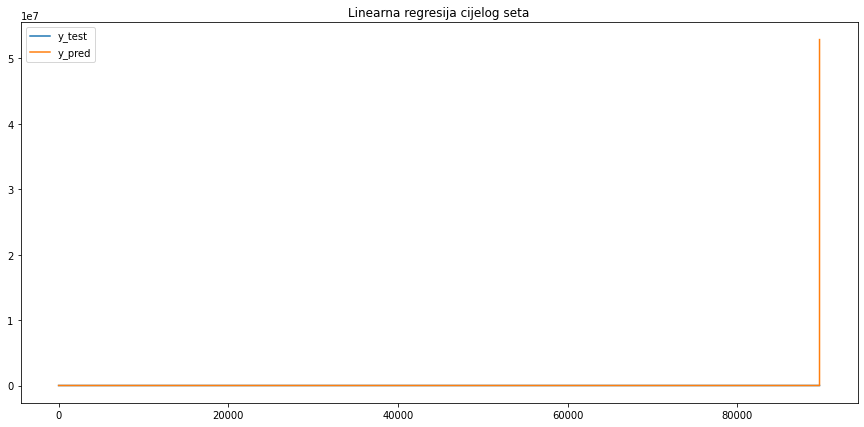

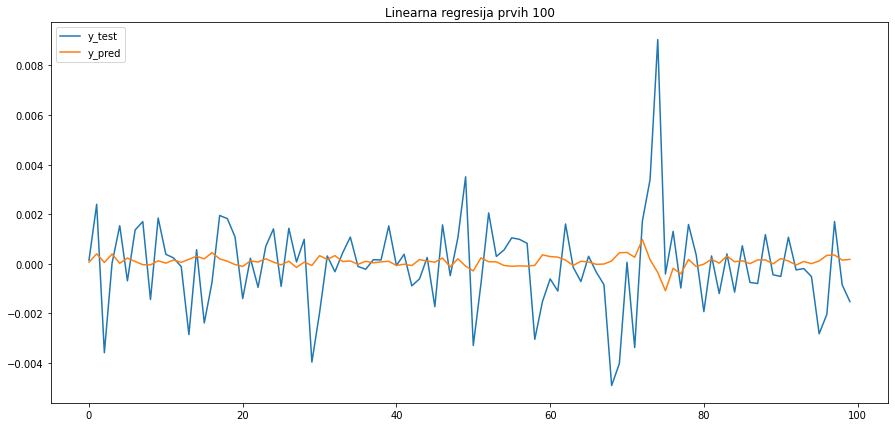

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	LOGISTIČKA REGRESIJA
1 . za iznos velicine lookaheada 1 minuta.
y_test = ['0' '1' '-1' ... '1' '-1' '0'] 
 y_pred = ['1' '1' '-1' ... '1' '1' '0']
Accuracy Score of train:  0.5559661458115613
Accuracy Score:  0.4937966090358827
F1:  0.45385588364730894
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	OVR LOGREG KLASIFIKACIJA
1 . za iznos velicine lookaheada 1 minuta.
y_test = ['0' '1' '-1' ... '1' '-1' '0'] 
 y_pred = ['1' '1' '-1' ... '1' '1' '0']
Accuracy Score of train:  0.5561667962534104
Accuracy Score:  0.496371601511554
----------------------------------------------------------------

KeyboardInterrupt: ignored

In [ ]:

X_30T = pd.read_csv('/content/drive/My Drive/dipl/final.csv', delimiter=',', header=0)
Y_10T = pd.read_csv('/content/drive/My Drive/dipl/targetReturn.csv', delimiter=',', header=0)
X_30T.replace([np.inf, -np.inf], np.nan, inplace=True)

X_30T = X_30T.fillna(0)

X_30T = X_30T.reset_index()

X_30T = X_30T.loc[: , 'Close/VWAP' : 'ReturnVW']
Y_10T = Y_10T.loc[: , 'Return' : 'Return10']

boundary = abs(Y_10T['Return']).median()
Return10 = []
for i, Return in enumerate(Y_10T['Return']):
  if (Y_10T['Return'][i] > boundary):
    Return10.append("1")
  elif(Y_10T['Return'][i] < -boundary): 
    Return10.append("-1")
  else :
    Return10.append("0")
Y_10T['Return10'] = Return10

print(X_30T)
print(Y_10T)

X_uk = [X_30T]
y_uk = [Y_10T]
#----------------Treniranje----------------
cnt = 0
for lookback_window in X_uk:
  for lookahead_window in y_uk:
      if(len(lookback_window)>=len(lookahead_window)):
        lookahead = round(len(lookback_window)/len(lookahead_window))
        if(len(lookback_window)>len(lookahead_window)):
          lookahead_window = pd.DataFrame(np.repeat(lookahead_window.values,lookahead, axis=0))
             
        X_train_temp, X_test_temp = np.split(lookback_window, [int(.8 *len(lookback_window))])
        y_train_temp, y_test_temp = np.split(lookahead_window, [int(.8 *len(lookahead_window))])
        X_test_temp = X_test_temp.reset_index(drop = True)
        y_test_temp = y_test_temp.reset_index(drop = True)
        
        scaler = StandardScaler().fit(X_train_temp)
        X_train_temp = scaler.transform(X_train_temp)
        X_test_temp = scaler.transform(X_test_temp)
        """
        print(X_train_temp)
        print(X_test_temp)
        print(y_train_temp)
        print(y_test_temp)
        print(' y_te =', y_test_temp, 'y_pred =', y_pred))
        """
        print(y_train_temp)
        y_train_real = y_train_temp.iloc[:,0]
        y_test_real = y_test_temp.iloc[:,0]
        y_train_10 = y_train_temp.iloc[:,1]
        y_test_10 = y_test_temp.iloc[:,1]
        print(y_train_10)
        
        cnt+=1
        #LINEARNA REGRESIJA
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        print('\tLINEARNA REGRESIJA')
        linreg = LinearRegression()
        X2 = sm.add_constant(X_train_temp)
        est = sm.OLS(y_train_real, X2)
        est2 = est.fit()
        print(est2.summary())
        linreg.fit(X_train_temp, y_train_real)
        y_pred_train = linreg.predict(X_train_temp)
        y_pred = linreg.predict(X_test_temp)
        
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija cijelog seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('Linearna regresija prvih 100')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

        #LOGISTIČKA REGRESIJA
        print('\n')
        print('\tLOGISTIČKA REGRESIJA')
        logreg = LogisticRegression(multi_class='multinomial')
        logreg.fit(X_train_temp ,y_train_10)
        y_pred_train = logreg.predict(X_train_temp)
        y_pred = logreg.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        #print('AUC: ', roc_auc_score(y_test_10, y_pred, multi_class='ovr'))
        print('F1: ', f1_score(y_test_10, y_pred, average='weighted'))
        #metrics.plot_roc_curve(logreg, X_test_temp, y_test_10)
        #plt.legend(['ROC curve'], loc='upper left')
        #plt.show()
        """
        plt.figure(figsize=(30,16))
        plt.title('Logistička regresija')
        plt.plot(np.arange(len(y_test_10)), y_test_10*5)
        plt.plot(np.arange(len(y_test_10)), y_pred*5)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        #OVR SVM KLASIFIKACIJA
        print('\n')
        print('\tOVR SVM KLASIFIKACIJA')
        ovr = OneVsRestClassifier(SVC())
        ovr.fit(X_train_temp ,y_train_10)
        y_pred_train = ovr.predict(X_train_temp)
        y_pred = ovr.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        """
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #OVR LOGREG KLASIFIKACIJA
        print('\n')
        print('\tOVR LOGREG KLASIFIKACIJA')
        ovr = OneVsRestClassifier(LogisticRegression())
        ovr.fit(X_train_temp ,y_train_10)
        y_pred_train = ovr.predict(X_train_temp)
        y_pred = ovr.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        """
        #OVR MultinomialNB KLASIFIKACIJA
        print('\n')
        print('\tOVR MultinomialNB KLASIFIKACIJA')
        ovr = OneVsRestClassifier(MultinomialNB())
        ovr.fit(X_train_temp ,y_train_10)
        y_pred_train = ovr.predict(X_train_temp)
        y_pred = ovr.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        """
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #GAUSSIAN NB KLASIFIKACIJA
        print('\n')
        print('\tGAUSSIAN NB KLASIFIKACIJA')
        gnb = GaussianNB()
        gnb.fit(X_train_temp ,y_train_10)
        y_pred_train = gnb.predict(X_train_temp)
        y_pred = gnb.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        #print('AUC: ', roc_auc_score(y_test_10, y_pred, multi_class='ovr'))
        print('F1: ', f1_score(y_test_10, y_pred, average='weighted'))
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #XGBOOST KLASIFIKACIJA
        print('\n')
        print('\tXGBOOST KLASIFIKACIJA')
        xgb = OneVsRestClassifier(XGBClassifier())
        xgb.fit(X_train_temp ,y_train_10)
        y_pred_train = xgb.predict(X_train_temp)
        y_pred = xgb.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        #print('AUC: ', roc_auc_score(y_test_10, y_pred, multi_class='ovr'))
        print('F1: ', f1_score(y_test_10, y_pred, average='weighted'))
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')

        #RandomForest
        print('\n')
        print('\tRF KLASIFIKACIJA')
        rfc = RandomForestClassifier(n_estimators=200)
        pom = []
        for col in X_30T.columns: 
          pom.append(col) 
        rfc.fit(X_train_temp ,y_train_10)
        #vizualizacija stabla odluke
        estimator = rfc.estimators_[1]
        from sklearn.tree import export_graphviz
        # Export as dot file
        export_graphviz(estimator, out_file='tree.dot', 
                        feature_names = pom,
                        class_names = [str(-1), str(0), str(1)],
                        rounded = True, proportion = False, 
                        precision = 2, filled = True)

        # Convert to png using system command (requires Graphviz)
        from subprocess import call
        call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
        # Display in jupyter notebook
        from IPython.display import Image
        Image(filename = 'tree.png')

        y_pred_train = rfc.predict(X_train_temp)
        y_pred = rfc.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        #print('AUC: ', roc_auc_score(y_test_10, y_pred, multi_class='ovr'))
        print('F1: ', f1_score(y_test_10, y_pred, average='weighted'))
        
        feature_imp = pd.Series(rfc.feature_importances_, index=pom).sort_values(ascending=False)
        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title("Visualizing Important Features")
        plt.legend()
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #LightGBM
        print('\n')
        print('\tLightGBM')
        print(len(X_train_temp), len(y_train_real))
        if(len(lookback_window)>len(lookahead_window)):
          X_test_temp = np.delete(X_test_temp, len(X_test_temp)-1, axis=0)
        print(X_test_temp.shape, len(y_test_real))
        lgb_train = lgb.Dataset(X_train_temp, y_train_real)
        lgb_eval = lgb.Dataset(X_test_temp, y_test_real, reference=lgb_train)
        params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'l2', 'l1'},
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbose': 0
        }
        gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
        y_pred = gbm.predict(X_test_temp, num_iteration=gbm.best_iteration)

        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_real.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy RMSE of train: ', mean_squared_error(y_train_real, y_pred_train)**0.5)
        print('Accuracy R2: ', r2_score(y_test_real, y_pred))
        print('Accuracy RMSE: ', mean_squared_error(y_test_real, y_pred)**0.5)
        plt.figure(figsize=(15,7))
        plt.title('LightGBM cijelog seta')
        plt.plot(np.arange(len(y_test_real)), y_test_real)
        plt.plot(np.arange(len(y_test_real)), y_pred)
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        plt.figure(figsize=(15,7))
        plt.title('LightGBM prvih 100')
        plt.plot(np.arange(100), y_test_real[0:100])
        plt.plot(np.arange(100), y_pred[0:100])
        plt.legend(['y_test', 'y_pred'], loc='upper left')
        plt.show()
        print('------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
        
        #OVR MLPClassifier (NN) KLASIFIKACIJA
        print('\n')
        print('\tOVR MLPClassifier (NN) KLASIFIKACIJA')
        ovr = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5, early_stopping = True))
        ovr.fit(X_train_temp ,y_train_10)
        y_pred_train = ovr.predict(X_train_temp)
        y_pred = ovr.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred, average='weighted'))
        
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
        
        """
        E_train = [];
        E_tst = [];

        for i in [200]:
            RF = RandomForestClassifier(n_estimators = i+1).fit(X_train_temp, y_train_10)
            print(i)
            h_train = RF.predict(X_train_temp)
            h_tst = RF.predict(X_test_temp)
            
            E_train.append(zero_one_loss(y_train_10, h_train))
            E_tst.append(zero_one_loss(y_test_10, h_tst))

        min_E = min(E_tst)
        ind = E_tst.index(min_E)

        plt.figure(figsize=(15, 7))
        plt.plot(np.arange(1), E_train, label = 'E_train')
        plt.plot(np.arange(1), E_tst, label = 'E_tst')
        plt.scatter(np.arange(1)[ind], min_E, label = 'min pogreske testiranja')

        plt.legend(loc = 'best'); plt.xlabel('L'); plt.ylabel('Eor')
        plt.grid();
        print (E_train)
        print (E_tst)

        print('Minimum pogreske za testiranje => ', min_E)

        #KNN
        #Prvo probat za različit broj susjeda koji daje najmanju grešku :)
        knn = KNeighborsClassifier(n_neighbors=100)
        knn.fit(X_train_temp, y_train_10)
        y_pred_train = knn.predict(X_train_temp)
        y_pred = knn.predict(X_test_temp)
        if(len(lookback_window)>len(lookahead_window)):
          y_pred = np.resize(y_pred, y_pred.size-1)
        print(cnt,'.', 'za iznos velicine lookaheada', lookahead,'minuta.')
        print('y_test =', y_test_10.to_numpy(),'\n','y_pred =', y_pred)
        print('Accuracy Score of train: ', accuracy_score(y_train_10, y_pred_train))
        print('Accuracy Score: ', accuracy_score(y_test_10, y_pred))
        print('AUC: ', roc_auc_score(y_test_10, y_pred))
        print('F1: ', f1_score(y_test_10, y_pred))
        
        for i in range(1, 40):
          knn = KNeighborsClassifier(n_neighbors=i)
          knn.fit(X_train_temp, y_train_10)
          pred_i = knn.predict(X_test_temp)
          error.append(np.mean(pred_i != y_test_10))
        plt.figure(figsize=(12, 6))
        plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
                markerfacecolor='blue', markersize=10)
        plt.title('Error Rate K Value')
        plt.xlabel('K Value')
        plt.ylabel('Mean Error')
        """